### >> Importaciones

In [1]:
import os
import random as rn


import pandas as pd
import scorecardpy as sc
import numpy as np

SEED = 29082013
os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
rn.seed(SEED)

In [2]:
def calcular_pesos(modelo):
    coef_model = pd.DataFrame(modelo.tvalues,columns=['t_value'])
    coef_model['t_value2'] = np.power(coef_model['t_value'], 2)
    coef_model['total'] = sum(coef_model['t_value2'])
    coef_model['part'] = coef_model['t_value2'] / coef_model['total']
    coef_model['pesos'] = coef_model['part'] * 100
    return coef_model['pesos'].sort_values(ascending=True)

### >> Load dataset

In [3]:
x_train = pd.read_csv("X_train.csv")
x_valid = pd.read_csv("X_valid.csv")

y_train = pd.read_csv("y_train.csv")
y_valid = pd.read_csv("y_valid.csv")

x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((51120, 60), (12781, 60), (51120, 1), (12781, 1))

In [4]:
x_train.head(3)

,Empleado,Tiempo_empleo,Saldo_cuenta,Valor_prestamo,Cuentas_otros,Autocontrol,Impulsividad,Confianza,Saldo_cuenta_menor_10000,cuentas_otros_x_valor_prestamo,...,tiempo_empleo_x_confianza_entre_cuentas_otros,autocontrol_x_impulsividad,autocontrol_x_impulsividad_entre_cuentas_otros,autocontrol_x_impulsividad_entre_tiempo_empleo,autocontrol_x_confianza,autocontrol_x_confianza_entre_cuentas_otros,autocontrol_x_confianza_entre_tiempo_empleo,impulsividad_x_confianza,impulsividad_x_confianza_entre_cuentas_otros,impulsividad_x_confianza_entre_tiempo_empleo
0,0.0,0.0000,0.000519,0.565394,0.000000,0.457831,0.265823,0.337209,1.0,0.000000,...,0.000000,0.186769,0.000000,0.000000,0.253265,0.000000,0.000000,0.153618,0.000000,0.000000
1,0.0,0.0000,0.001129,0.652883,0.000000,0.542169,0.405063,0.569767,1.0,0.000000,...,0.000000,0.328853,0.000000,0.000000,0.479897,0.000000,0.000000,0.378030,0.000000,0.000000
2,1.0,0.0625,0.000034,0.533107,0.285714,0.506024,0.316456,0.372093,1.0,0.244338,...,0.026042,0.244720,0.158245,0.107276,0.304467,0.165205,0.123843,0.198779,0.123124,0.086418


In [5]:
x_valid.head(3)

,Empleado,Tiempo_empleo,Saldo_cuenta,Valor_prestamo,Cuentas_otros,Autocontrol,Impulsividad,Confianza,Saldo_cuenta_menor_10000,cuentas_otros_x_valor_prestamo,...,tiempo_empleo_x_confianza_entre_cuentas_otros,autocontrol_x_impulsividad,autocontrol_x_impulsividad_entre_cuentas_otros,autocontrol_x_impulsividad_entre_tiempo_empleo,autocontrol_x_confianza,autocontrol_x_confianza_entre_cuentas_otros,autocontrol_x_confianza_entre_tiempo_empleo,impulsividad_x_confianza,impulsividad_x_confianza_entre_cuentas_otros,impulsividad_x_confianza_entre_tiempo_empleo
0,1.0,0.020833,0.005792,0.498766,0.000000,0.638554,0.708861,0.406977,1.0,0.0,...,0.000438,0.645837,0.000000,0.722599,0.411512,0.000000,0.487813,0.450567,0.000000,0.513076
1,1.0,0.041667,0.000050,0.637663,0.000000,0.385542,0.468354,0.383721,1.0,0.0,...,0.000438,0.263920,0.000000,0.170586,0.242612,0.000000,0.152371,0.291020,0.000000,0.176144
2,1.0,0.125000,0.000469,0.000000,0.142857,0.481928,0.303797,0.279070,1.0,0.0,...,0.083333,0.223425,0.295769,0.050007,0.224742,0.253844,0.047440,0.141587,0.191768,0.033525


In [6]:
y_train.fillna(-1).value_counts()

Incumplimiento
0                 43904
1                  7216
dtype: int64

In [7]:
y_valid.fillna(-1).value_counts()

Incumplimiento
0                 10977
1                  1804
dtype: int64

### >> CORRELACION

In [8]:
x_train['target'] = y_train.values
matriz_corr = x_train.corr(method='spearman')

matriz_corr.style.background_gradient(
    cmap='coolwarm', axis=None
).set_precision(5)

,Empleado,Tiempo_empleo,Saldo_cuenta,Valor_prestamo,Cuentas_otros,Autocontrol,Impulsividad,Confianza,Saldo_cuenta_menor_10000,cuentas_otros_x_valor_prestamo,cuentas_otros_x_valor_prestamo_entre_tiempo_empleo,cuentas_otros_x_saldo_cuenta,cuentas_otros_x_saldo_cuenta_entre_tiempo_empleo,cuentas_otros_x_tiempo_empleo,cuentas_otros_x_autocontrol,cuentas_otros_x_autocontrol_entre_tiempo_empleo,cuentas_otros_x_impulsividad,cuentas_otros_x_impulsividad_entre_tiempo_empleo,cuentas_otros_x_confianza,cuentas_otros_x_confianza_entre_tiempo_empleo,valor_prestamo_x_saldo_cuenta,valor_prestamo_x_saldo_cuenta_entre_cuentas_otros,valor_prestamo_x_saldo_cuenta_entre_tiempo_empleo,valor_prestamo_x_tiempo_empleo,valor_prestamo_x_tiempo_empleo_entre_cuentas_otros,valor_prestamo_x_autocontrol,valor_prestamo_x_autocontrol_entre_cuentas_otros,valor_prestamo_x_autocontrol_entre_tiempo_empleo,valor_prestamo_x_impulsividad,valor_prestamo_x_impulsividad_entre_cuentas_otros,valor_prestamo_x_impulsividad_entre_tiempo_empleo,valor_prestamo_x_confianza,valor_prestamo_x_confianza_entre_cuentas_otros,valor_prestamo_x_confianza_entre_tiempo_empleo,saldo_cuenta_x_tiempo_empleo,saldo_cuenta_x_tiempo_empleo_entre_cuentas_otros,saldo_cuenta_x_autocontrol,saldo_cuenta_x_autocontrol_entre_cuentas_otros,saldo_cuenta_x_autocontrol_entre_tiempo_empleo,saldo_cuenta_x_impulsividad,saldo_cuenta_x_impulsividad_entre_cuentas_otros,saldo_cuenta_x_impulsividad_entre_tiempo_empleo,saldo_cuenta_x_confianza,saldo_cuenta_x_confianza_entre_cuentas_otros,saldo_cuenta_x_confianza_entre_tiempo_empleo,tiempo_empleo_x_autocontrol,tiempo_empleo_x_autocontrol_entre_cuentas_otros,tiempo_empleo_x_impulsividad,tiempo_empleo_x_impulsividad_entre_cuentas_otros,tiempo_empleo_x_confianza,tiempo_empleo_x_confianza_entre_cuentas_otros,autocontrol_x_impulsividad,autocontrol_x_impulsividad_entre_cuentas_otros,autocontrol_x_impulsividad_entre_tiempo_empleo,autocontrol_x_confianza,autocontrol_x_confianza_entre_cuentas_otros,autocontrol_x_confianza_entre_tiempo_empleo,impulsividad_x_confianza,impulsividad_x_confianza_entre_cuentas_otros,impulsividad_x_confianza_entre_tiempo_empleo,target
Empleado,1.00000,0.61398,0.00248,-0.00547,-0.00123,0.00558,-0.00528,0.00263,0.00068,-0.00103,0.20867,0.00231,0.23410,0.40991,-0.00132,0.25421,-0.00207,0.25412,0.00146,0.25414,-0.00251,0.00119,0.49295,0.55269,0.55857,-0.00055,0.00240,0.49295,-0.00896,0.00185,0.49295,-0.00410,0.00371,0.49295,0.61243,0.62144,0.00287,0.00400,0.61195,0.00236,0.00418,0.61200,0.00266,0.00461,0.61200,0.61243,0.62144,0.61243,0.62144,0.61243,0.62144,0.00260,0.00533,0.61243,0.00612,0.00817,0.61243,-0.00189,0.00737,0.61243,-0.00068
Tiempo_empleo,0.61398,1.00000,0.00249,-0.00161,-0.00478,0.00287,-0.00603,0.00498,-0.00363,-0.00424,-0.02739,-0.00157,0.06834,0.48167,-0.00489,-0.03544,-0.00618,-0.03550,-0.00242,-0.03534,0.00119,0.00023,0.17141,0.82272,0.52972,0.00069,0.00068,-0.10831,-0.00583,0.00008,-0.10881,0.00265,0.00230,-0.10863,0.60456,0.49078,0.00293,0.00065,0.20995,0.00186,0.00054,0.20984,0.00301,0.00118,0.21025,0.97458,0.60936,0.97445,0.60944,0.97483,0.60955,-0.00087,0.00097,-0.13988,0.00642,0.00361,-0.13960,-0.00035,0.00276,-0.14035,0.00096
Saldo_cuenta,0.00248,0.00249,1.00000,0.00325,0.00055,-0.00083,0.00214,-0.00655,-0.23050,0.00502,0.00234,0.40314,0.27885,0.00017,0.00010,-0.00114,0.00064,-0.00048,-0.00030,-0.00139,0.80431,0.32501,0.53089,0.00614,0.00361,0.00206,0.00078,0.00032,0.00321,0.00123,0.00165,-0.00257,-0.00036,-0.00096,0.66056,0.26750,0.99384,0.40087,0.65728,0.99388,0.40095,0.65716,0.99380,0.40074,0.65733,0.00199,-0.00008,0.00296,0.00050,0.00027,-0.00038,0.00213,-0.00257,0.00040,-0.00310,-0.00330,-0.00265,-0.00218,-0.00260,-0.00120,-0.00791
Valor_prestamo,-0.00547,-0.00161,0.00325,1.00000,0.00018,0.00950,-0.00224,0.00085,0.00072,0.33262,0.23266,0.00160,-0.00015,-0.00015,0.00200,-0.00090,-0.00016,-0.00127,0.00067,-0.00118,0.35322,0.30899,0.32616,0.37888,0.28419,0.79440,0.39945,0.41452,0.79327,0.39820,0.41385,0.79586,0.39869,0.41424

In [9]:
pd.DataFrame(matriz_corr['target'].abs().sort_values(ascending=False)).style.background_gradient(
    cmap='coolwarm', axis=None
).set_precision(5)

,target
target,1.00000
saldo_cuenta_x_autocontrol,0.00815
Saldo_cuenta,0.00791
saldo_cuenta_x_impulsividad,0.00780
saldo_cuenta_x_confianza,0.00773
valor_prestamo_x_saldo_cuenta,0.00716
valor_prestamo_x_autocontrol,0.00618
saldo_cuenta_x_confianza_entre_tiempo_empleo,0.00447
saldo_cuenta_x_autocontrol_entre_tiempo_empleo,0.00439
Valor_prestamo,0.00436


In [10]:
%%time

cortes = sc.woebin(
    x_train,
    y='target',
    method='tree',
    no_cores=4,
    count_distr_limit=0.05  # el 5% por bin es lo mínimo recomendable para arboles
)

[INFO] creating woe binning ...
Binning on 51120 rows and 61 columns in 00:02:11
Wall time: 2min 11s


In [11]:
dic_maxprob_corte = {}

for k, v in cortes.items():
    max_probabilidad_malo = v[v['bin'] != 'missing']['badprob'].max()
    max_iv = v['total_iv'].max()
    max_woe = v['woe'].max()
    
    dic_maxprob_corte[k] = [
        max_probabilidad_malo, max_iv, max_woe
    ]

In [12]:
listado_mayor_prob_corte = sorted([(k, v) for k, v in dic_maxprob_corte.items()], key=lambda _: _[1][1], reverse=True)
for row in listado_mayor_prob_corte:
    print("/"*20, row[0])
    #print("."*3, ' máxima prob malo: ', str(round(row[1][0]*100, 2)), " %")
    #print("."*3, ' máxima iv       : ', str(round(row[1][1], 5)))
    #print("."*3, ' máxima woe      : ', str(round(row[1][2], 5)))
    
    display(cortes[row[0]])

//////////////////// autocontrol_x_impulsividad_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,autocontrol_x_impulsividad_entre_tiempo_empleo,"[-inf,0.07)",26026,0.509116,22340,3686,0.141628,0.003868,0.000008,0.003646,0.07,False
1,autocontrol_x_impulsividad_entre_tiempo_empleo,"[0.07,0.08)",2863,0.056005,2469,394,0.137618,-0.029513,0.000048,0.003646,0.08,False
2,autocontrol_x_impulsividad_entre_tiempo_empleo,"[0.08,0.1)",4703,0.091999,3998,705,0.149904,0.070353,0.000467,0.003646,0.1,False
3,autocontrol_x_impulsividad_entre_tiempo_empleo,"[0.1,0.14)",6116,0.119640,5322,794,0.129823,-0.096816,0.001083,0.003646,0.14,False
4,autocontrol_x_impulsividad_entre_tiempo_empleo,"[0.14,0.19)",4129,0.080771,3542,587,0.142165,0.008283,0.000006,0.003646,0.19,False
5,autocontrol_x_impulsividad_entre_tiempo_empleo,"[0.19,0.29)",3633,0.071068,3057,576,0.158547,0.136623,0.001393,0.003646,0.29,False
6,autocontrol_x_impulsividad_entre_tiempo_empleo,"[0.29,inf)",3650,0.071401,3176,474,0.129863,-0.096466,0.000642,0.003646,inf,False


//////////////////// autocontrol_x_confianza_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,autocontrol_x_confianza_entre_tiempo_empleo,"[-inf,0.08)",27398,0.535955,23556,3842,0.140229,-0.007683,0.000032,0.003463,0.08,False
1,autocontrol_x_confianza_entre_tiempo_empleo,"[0.08,0.11)",6854,0.134077,5806,1048,0.152903,0.093696,0.001217,0.003463,0.11,False
2,autocontrol_x_confianza_entre_tiempo_empleo,"[0.11,0.13)",3085,0.060348,2666,419,0.135818,-0.044759,0.000119,0.003463,0.13,False
3,autocontrol_x_confianza_entre_tiempo_empleo,"[0.13,0.17)",4194,0.082042,3666,528,0.125894,-0.132055,0.001364,0.003463,0.17,False
4,autocontrol_x_confianza_entre_tiempo_empleo,"[0.17,0.36)",6737,0.131788,5737,1000,0.148434,0.058768,0.000465,0.003463,0.36,False
5,autocontrol_x_confianza_entre_tiempo_empleo,"[0.36,inf)",2852,0.055790,2473,379,0.132889,-0.069946,0.000266,0.003463,inf,False


//////////////////// saldo_cuenta_x_confianza_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,saldo_cuenta_x_confianza_entre_tiempo_empleo,"[-inf,0.0002)",32211,0.630106,27610,4601,0.142839,0.013800,0.000121,0.003091,0.0002,False
1,saldo_cuenta_x_confianza_entre_tiempo_empleo,"[0.0002,0.00030000000000000003)",3117,0.060974,2631,486,0.155919,0.116794,0.000867,0.003091,0.00030000000000000003,False
2,saldo_cuenta_x_confianza_entre_tiempo_empleo,"[0.00030000000000000003,0.0005)",3652,0.071440,3187,465,0.127327,-0.119093,0.000971,0.003091,0.0005,False
3,saldo_cuenta_x_confianza_entre_tiempo_empleo,"[0.0005,0.0008)",2887,0.056475,2460,427,0.147904,0.054572,0.000172,0.003091,0.0008,False
4,saldo_cuenta_x_confianza_entre_tiempo_empleo,"[0.0008,0.0018000000000000002)",3955,0.077367,3406,549,0.138812,-0.019491,0.000029,0.003091,0.0018000000000000002,False
5,saldo_cuenta_x_confianza_entre_tiempo_empleo,"[0.0018000000000000002,inf)",5298,0.103638,4610,688,0.129860,-0.096490,0.000932,0.003091,inf,False


//////////////////// valor_prestamo_x_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,valor_prestamo_x_tiempo_empleo,"[-inf,0.03)",16846,0.329538,14499,2347,0.139321,-0.015237,0.000076,0.002344,0.03,False
1,valor_prestamo_x_tiempo_empleo,"[0.03,0.05)",5284,0.103365,4496,788,0.149129,0.064259,0.000437,0.002344,0.05,False
2,valor_prestamo_x_tiempo_empleo,"[0.05,0.07)",5342,0.104499,4603,739,0.138338,-0.023461,0.000057,0.002344,0.07,False
3,valor_prestamo_x_tiempo_empleo,"[0.07,0.14)",13455,0.263204,11510,1945,0.144556,0.027750,0.000205,0.002344,0.14,False
4,valor_prestamo_x_tiempo_empleo,"[0.14,0.19)",4897,0.095794,4269,628,0.128242,-0.110890,0.001132,0.002344,0.19,False
5,valor_prestamo_x_tiempo_empleo,"[0.19,0.24)",2574,0.050352,2182,392,0.152292,0.088969,0.000411,0.002344,0.24,False
6,valor_prestamo_x_tiempo_empleo,"[0.24,inf)",2722,0.053247,2345,377,0.138501,-0.022091,0.000026,0.002344,inf,False


//////////////////// impulsividad_x_confianza_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,impulsividad_x_confianza_entre_tiempo_empleo,"[-inf,0.05)",18848,0.368701,16160,2688,0.142615,0.011963,0.000053,0.00225,0.05,False
1,impulsividad_x_confianza_entre_tiempo_empleo,"[0.05,0.06)",3673,0.071851,3193,480,0.130683,-0.089225,0.000554,0.00225,0.06,False
2,impulsividad_x_confianza_entre_tiempo_empleo,"[0.06,0.09)",8780,0.171753,7515,1265,0.144077,0.023876,0.000099,0.00225,0.09,False
3,impulsividad_x_confianza_entre_tiempo_empleo,"[0.09,0.11)",4016,0.078560,3490,526,0.130976,-0.086651,0.000572,0.00225,0.11,False
4,impulsividad_x_confianza_entre_tiempo_empleo,"[0.11,0.13)",3027,0.059214,2574,453,0.149653,0.068380,0.000284,0.00225,0.13,False
5,impulsividad_x_confianza_entre_tiempo_empleo,"[0.13,0.21)",6454,0.126252,5563,891,0.138054,-0.025844,0.000084,0.00225,0.21,False
6,impulsividad_x_confianza_entre_tiempo_empleo,"[0.21,0.35000000000000003)",3651,0.071420,3099,552,0.151191,0.080418,0.000475,0.00225,0.35000000000000003,False
7,impulsividad_x_confianza_entre_tiempo_empleo,"[0.35000000000000003,inf)",2671,0.052250,2310,361,0.135155,-0.050420,0.000130,0.00225,inf,False


//////////////////// saldo_cuenta_x_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,saldo_cuenta_x_tiempo_empleo,"[-inf,0.0004)",33760,0.660407,28970,4790,0.141884,0.005974,0.000024,0.00207,0.0004,False
1,saldo_cuenta_x_tiempo_empleo,"[0.0004,0.0008)",5003,0.097868,4308,695,0.138917,-0.018613,0.000034,0.00207,0.0008,False
2,saldo_cuenta_x_tiempo_empleo,"[0.0008,0.0012000000000000001)",2633,0.051506,2216,417,0.158374,0.135332,0.000990,0.00207,0.0012000000000000001,False
3,saldo_cuenta_x_tiempo_empleo,"[0.0012000000000000001,0.0021000000000000003)",2957,0.057844,2529,428,0.144741,0.029249,0.000050,0.00207,0.0021000000000000003,False
4,saldo_cuenta_x_tiempo_empleo,"[0.0021000000000000003,inf)",6767,0.132375,5881,886,0.130930,-0.087060,0.000972,0.00207,inf,False


//////////////////// valor_prestamo_x_impulsividad_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,valor_prestamo_x_impulsividad_entre_tiempo_empleo,"[-inf,0.03)",15588,0.304930,13412,2176,0.139595,-0.012957,0.000051,0.002056,0.03,False
1,valor_prestamo_x_impulsividad_entre_tiempo_empleo,"[0.03,0.05)",6489,0.126937,5530,959,0.147789,0.053653,0.000372,0.002056,0.05,False
2,valor_prestamo_x_impulsividad_entre_tiempo_empleo,"[0.05,0.06)",3156,0.061737,2728,428,0.135615,-0.046496,0.000131,0.002056,0.06,False
3,valor_prestamo_x_impulsividad_entre_tiempo_empleo,"[0.06,0.07)",2964,0.057981,2502,462,0.155870,0.116424,0.000819,0.002056,0.07,False
4,valor_prestamo_x_impulsividad_entre_tiempo_empleo,"[0.07,0.08)",2640,0.051643,2296,344,0.130303,-0.092577,0.000428,0.002056,0.08,False
5,valor_prestamo_x_impulsividad_entre_tiempo_empleo,"[0.08,0.13)",8588,0.167997,7392,1196,0.139264,-0.015711,0.000041,0.002056,0.13,False
6,valor_prestamo_x_impulsividad_entre_tiempo_empleo,"[0.13,0.16)",2901,0.056749,2510,391,0.134781,-0.053626,0.000160,0.002056,0.16,False
7,valor_prestamo_x_impulsividad_entre_tiempo_empleo,"[0.16,inf)",8794,0.172027,7534,1260,0.143280,0.017390,0.000052,0.002056,inf,False


//////////////////// valor_prestamo_x_saldo_cuenta_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,valor_prestamo_x_saldo_cuenta_entre_tiempo_empleo,"[-inf,0.0001)",27437,0.536718,23543,3894,0.141925,0.006313,0.000021,0.001893,0.0001,False
1,valor_prestamo_x_saldo_cuenta_entre_tiempo_empleo,"[0.0001,0.0002)",4872,0.095305,4155,717,0.147167,0.048713,0.000230,0.001893,0.0002,False
2,valor_prestamo_x_saldo_cuenta_entre_tiempo_empleo,"[0.0002,0.0004)",4927,0.096381,4194,733,0.148772,0.061440,0.000372,0.001893,0.0004,False
3,valor_prestamo_x_saldo_cuenta_entre_tiempo_empleo,"[0.0004,0.0008)",4266,0.083451,3701,565,0.132443,-0.073828,0.000443,0.001893,0.0008,False
4,valor_prestamo_x_saldo_cuenta_entre_tiempo_empleo,"[0.0008,0.0014)",2804,0.054851,2397,407,0.145150,0.032545,0.000059,0.001893,0.0014,False
5,valor_prestamo_x_saldo_cuenta_entre_tiempo_empleo,"[0.0014,inf)",6814,0.133294,5914,900,0.132081,-0.076978,0.000768,0.001893,inf,False


//////////////////// valor_prestamo_x_autocontrol_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,valor_prestamo_x_autocontrol_entre_tiempo_empleo,"[-inf,0.04)",18761,0.366999,16135,2626,0.139971,-0.009824,0.000035,0.001801,0.04,False
1,valor_prestamo_x_autocontrol_entre_tiempo_empleo,"[0.04,0.07)",9720,0.190141,8289,1431,0.147222,0.049149,0.000467,0.001801,0.07,False
2,valor_prestamo_x_autocontrol_entre_tiempo_empleo,"[0.07,0.1)",6722,0.131495,5784,938,0.139542,-0.013396,0.000023,0.001801,0.1,False
3,valor_prestamo_x_autocontrol_entre_tiempo_empleo,"[0.1,0.12)",3221,0.063009,2756,465,0.144365,0.026206,0.000044,0.001801,0.12,False
4,valor_prestamo_x_autocontrol_entre_tiempo_empleo,"[0.12,0.16)",4079,0.079793,3557,522,0.127973,-0.113301,0.000983,0.001801,0.16,False
5,valor_prestamo_x_autocontrol_entre_tiempo_empleo,"[0.16,0.26)",4587,0.089730,3912,675,0.147155,0.048613,0.000216,0.001801,0.26,False
6,valor_prestamo_x_autocontrol_entre_tiempo_empleo,"[0.26,inf)",4030,0.078834,3471,559,0.138710,-0.020344,0.000032,0.001801,inf,False


//////////////////// cuentas_otros_x_autocontrol_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,cuentas_otros_x_autocontrol_entre_tiempo_empleo,"[-inf,0.01)",24684,0.482864,21215,3469,0.140536,-0.005137,0.000013,0.001654,0.01,False
1,cuentas_otros_x_autocontrol_entre_tiempo_empleo,"[0.01,0.02)",4449,0.087031,3846,603,0.135536,-0.047167,0.000190,0.001654,0.02,False
2,cuentas_otros_x_autocontrol_entre_tiempo_empleo,"[0.02,0.04)",7742,0.151448,6584,1158,0.149574,0.067757,0.000712,0.001654,0.04,False
3,cuentas_otros_x_autocontrol_entre_tiempo_empleo,"[0.04,0.08)",7434,0.145423,6422,1012,0.136131,-0.042096,0.000254,0.001654,0.08,False
4,cuentas_otros_x_autocontrol_entre_tiempo_empleo,"[0.08,0.12)",2818,0.055125,2391,427,0.151526,0.083022,0.000391,0.001654,0.12,False
5,cuentas_otros_x_autocontrol_entre_tiempo_empleo,"[0.12,inf)",3993,0.078110,3446,547,0.136990,-0.034816,0.000094,0.001654,inf,False


//////////////////// valor_prestamo_x_saldo_cuenta_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,valor_prestamo_x_saldo_cuenta_entre_cuentas_otros,"[-inf,0.0001)",28865,0.564652,24765,4100,0.142041,0.007260,0.000030,0.001574,0.0001,False
1,valor_prestamo_x_saldo_cuenta_entre_cuentas_otros,"[0.0001,0.0002)",3414,0.066784,2910,504,0.147627,0.052373,0.000187,0.001574,0.0002,False
2,valor_prestamo_x_saldo_cuenta_entre_cuentas_otros,"[0.0002,0.0006000000000000001)",6069,0.118721,5242,827,0.136266,-0.040949,0.000196,0.001574,0.0006000000000000001,False
3,valor_prestamo_x_saldo_cuenta_entre_cuentas_otros,"[0.0006000000000000001,0.001)",2725,0.053306,2307,418,0.153394,0.097483,0.000524,0.001574,0.001,False
4,valor_prestamo_x_saldo_cuenta_entre_cuentas_otros,"[0.001,0.0024000000000000002)",4004,0.078326,3437,567,0.141608,0.003710,0.000001,0.001574,0.0024000000000000002,False
5,valor_prestamo_x_saldo_cuenta_entre_cuentas_otros,"[0.0024000000000000002,inf)",6043,0.118212,5243,800,0.132385,-0.074333,0.000636,0.001574,inf,False


//////////////////// cuentas_otros_x_saldo_cuenta_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,cuentas_otros_x_saldo_cuenta_entre_tiempo_empleo,"[-inf,0.0001)",33006,0.645657,28374,4632,0.140338,-0.006780,0.000030,0.001517,0.0001,False
1,cuentas_otros_x_saldo_cuenta_entre_tiempo_empleo,"[0.0001,0.0002)",3262,0.063811,2756,506,0.155120,0.110706,0.000814,0.001517,0.0002,False
2,cuentas_otros_x_saldo_cuenta_entre_tiempo_empleo,"[0.0002,0.0004)",3359,0.065708,2877,482,0.143495,0.019145,0.000024,0.001517,0.0004,False
3,cuentas_otros_x_saldo_cuenta_entre_tiempo_empleo,"[0.0004,0.0009000000000000001)",3704,0.072457,3157,547,0.147678,0.052776,0.000206,0.001517,0.0009000000000000001,False
4,cuentas_otros_x_saldo_cuenta_entre_tiempo_empleo,"[0.0009000000000000001,inf)",7789,0.152367,6740,1049,0.134677,-0.054518,0.000444,0.001517,inf,False


//////////////////// cuentas_otros_x_saldo_cuenta


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,cuentas_otros_x_saldo_cuenta,"[-inf,0.00030000000000000003)",32619,0.638087,27991,4628,0.141880,0.005946,0.000023,0.001515,0.00030000000000000003,False
1,cuentas_otros_x_saldo_cuenta,"[0.00030000000000000003,0.0005)",3200,0.062598,2728,472,0.147500,0.051360,0.000168,0.001515,0.0005,False
2,cuentas_otros_x_saldo_cuenta,"[0.0005,0.0009000000000000001)",3530,0.069053,3060,470,0.133144,-0.067733,0.000309,0.001515,0.0009000000000000001,False
3,cuentas_otros_x_saldo_cuenta,"[0.0009000000000000001,0.0031000000000000003)",6162,0.120540,5254,908,0.147355,0.050204,0.000309,0.001515,0.0031000000000000003,False
4,cuentas_otros_x_saldo_cuenta,"[0.0031000000000000003,inf)",5609,0.109722,4871,738,0.131574,-0.081406,0.000706,0.001515,inf,False


//////////////////// saldo_cuenta_x_autocontrol_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,saldo_cuenta_x_autocontrol_entre_cuentas_otros,"[-inf,0.0001)",28606,0.559585,24511,4095,0.143152,0.016349,0.000150,0.001495,0.0001,False
1,saldo_cuenta_x_autocontrol_entre_cuentas_otros,"[0.0001,0.00030000000000000003)",6596,0.129030,5712,884,0.134021,-0.060163,0.000457,0.001495,0.00030000000000000003,False
2,saldo_cuenta_x_autocontrol_entre_cuentas_otros,"[0.00030000000000000003,0.0008)",5904,0.115493,5026,878,0.148713,0.060972,0.000439,0.001495,0.0008,False
3,saldo_cuenta_x_autocontrol_entre_cuentas_otros,"[0.0008,0.0014)",2828,0.055321,2436,392,0.138614,-0.021146,0.000025,0.001495,0.0014,False
4,saldo_cuenta_x_autocontrol_entre_cuentas_otros,"[0.0014,inf)",7186,0.140571,6219,967,0.134567,-0.055461,0.000424,0.001495,inf,False


//////////////////// cuentas_otros_x_impulsividad_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,cuentas_otros_x_impulsividad_entre_tiempo_empleo,"[-inf,0.01)",25232,0.493584,21693,3539,0.140258,-0.007441,0.000027,0.001477,0.01,False
1,cuentas_otros_x_impulsividad_entre_tiempo_empleo,"[0.01,0.02)",5387,0.105379,4611,776,0.144050,0.023657,0.000059,0.001477,0.02,False
2,cuentas_otros_x_impulsividad_entre_tiempo_empleo,"[0.02,0.04)",7948,0.155477,6796,1152,0.144942,0.030870,0.000150,0.001477,0.04,False
3,cuentas_otros_x_impulsividad_entre_tiempo_empleo,"[0.04,0.05)",2577,0.050411,2256,321,0.124563,-0.144203,0.000995,0.001477,0.05,False
4,cuentas_otros_x_impulsividad_entre_tiempo_empleo,"[0.05,0.1)",5792,0.113302,4944,848,0.146409,0.042655,0.000209,0.001477,0.1,False
5,cuentas_otros_x_impulsividad_entre_tiempo_empleo,"[0.1,inf)",4184,0.081847,3604,580,0.138623,-0.021067,0.000036,0.001477,inf,False


//////////////////// tiempo_empleo_x_confianza


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,tiempo_empleo_x_confianza,"[-inf,0.01)",8209,0.160583,7062,1147,0.139725,-0.011874,0.000023,0.001397,0.01,False
1,tiempo_empleo_x_confianza,"[0.01,0.03)",3910,0.076487,3380,530,0.135550,-0.047049,0.000166,0.001397,0.03,False
2,tiempo_empleo_x_confianza,"[0.03,0.07)",10237,0.200254,8732,1505,0.147016,0.047503,0.000460,0.001397,0.07,False
3,tiempo_empleo_x_confianza,"[0.07,0.16)",17822,0.348631,15317,2505,0.140557,-0.004970,0.000009,0.001397,0.16,False
4,tiempo_empleo_x_confianza,"[0.16,0.22)",5510,0.107786,4778,732,0.132849,-0.070292,0.000519,0.001397,0.22,False
5,tiempo_empleo_x_confianza,"[0.22,inf)",5432,0.106260,4635,797,0.146723,0.045168,0.000220,0.001397,inf,False


//////////////////// valor_prestamo_x_saldo_cuenta


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,valor_prestamo_x_saldo_cuenta,"[-inf,0.002)",38516,0.753443,32999,5517,0.143239,0.017062,0.000221,0.001356,0.002,False
1,valor_prestamo_x_saldo_cuenta,"[0.002,0.004)",4618,0.090336,3975,643,0.139238,-0.015931,0.000023,0.001356,0.004,False
2,valor_prestamo_x_saldo_cuenta,"[0.004,0.008)",3449,0.067469,3011,438,0.126993,-0.122104,0.000963,0.001356,0.008,False
3,valor_prestamo_x_saldo_cuenta,"[0.008,inf)",4537,0.088752,3919,618,0.136213,-0.041399,0.000150,0.001356,inf,False


//////////////////// valor_prestamo_x_impulsividad


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,valor_prestamo_x_impulsividad,"[-inf,0.2)",6635,0.129793,5711,924,0.139261,-0.015733,0.000032,0.001354,0.2,False
1,valor_prestamo_x_impulsividad,"[0.2,0.4)",22960,0.449139,19706,3254,0.141725,0.004667,0.000010,0.001354,0.4,False
2,valor_prestamo_x_impulsividad,"[0.4,0.5)",12673,0.247907,10824,1849,0.145901,0.038584,0.000374,0.001354,0.5,False
3,valor_prestamo_x_impulsividad,"[0.5,0.6000000000000001)",6247,0.122203,5386,861,0.137826,-0.027759,0.000093,0.001354,0.6000000000000001,False
4,valor_prestamo_x_impulsividad,"[0.6000000000000001,inf)",2605,0.050959,2277,328,0.125912,-0.131896,0.000845,0.001354,inf,False


//////////////////// saldo_cuenta_x_autocontrol_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,saldo_cuenta_x_autocontrol_entre_tiempo_empleo,"[-inf,0.0002)",33786,0.660915,28954,4832,0.143018,0.015257,0.000155,0.001173,0.0002,False
1,saldo_cuenta_x_autocontrol_entre_tiempo_empleo,"[0.0002,0.00030000000000000003)",3033,0.059331,2582,451,0.148698,0.060852,0.000225,0.001173,0.00030000000000000003,False
2,saldo_cuenta_x_autocontrol_entre_tiempo_empleo,"[0.00030000000000000003,0.0015)",9062,0.177269,7822,1240,0.136835,-0.036124,0.000228,0.001173,0.0015,False
3,saldo_cuenta_x_autocontrol_entre_tiempo_empleo,"[0.0015,inf)",5239,0.102484,4546,693,0.132277,-0.075268,0.000565,0.001173,inf,False


//////////////////// tiempo_empleo_x_impulsividad_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,tiempo_empleo_x_impulsividad_entre_cuentas_otros,"[-inf,0.03)",28276,0.553130,24317,3959,0.140013,-0.009480,0.000050,0.001172,0.03,False
1,tiempo_empleo_x_impulsividad_entre_cuentas_otros,"[0.03,0.11)",12962,0.253560,11109,1853,0.142956,0.014755,0.000055,0.001172,0.11,False
2,tiempo_empleo_x_impulsividad_entre_cuentas_otros,"[0.11,0.18)",5263,0.102954,4471,792,0.150485,0.074899,0.000593,0.001172,0.18,False
3,tiempo_empleo_x_impulsividad_entre_cuentas_otros,"[0.18,inf)",4619,0.090356,4007,612,0.132496,-0.073361,0.000474,0.001172,inf,False


//////////////////// saldo_cuenta_x_confianza


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,saldo_cuenta_x_confianza,"[-inf,0.001)",35855,0.701389,30716,5139,0.143327,0.017779,0.000223,0.001152,0.001,False
1,saldo_cuenta_x_confianza,"[0.001,0.003)",7915,0.154832,6842,1073,0.135565,-0.046917,0.000335,0.001152,0.003,False
2,saldo_cuenta_x_confianza,"[0.003,0.005)",2557,0.050020,2186,371,0.145092,0.032078,0.000052,0.001152,0.005,False
3,saldo_cuenta_x_confianza,"[0.005,inf)",4793,0.093760,4160,633,0.132068,-0.077095,0.000542,0.001152,inf,False


//////////////////// valor_prestamo_x_tiempo_empleo_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,valor_prestamo_x_tiempo_empleo_entre_cuentas_o...,"[-inf,0.02)",29842,0.583764,25649,4193,0.140507,-0.005383,0.000017,0.001112,0.02,False
1,valor_prestamo_x_tiempo_empleo_entre_cuentas_o...,"[0.02,0.04)",4673,0.091412,3977,696,0.148941,0.062771,0.000368,0.001112,0.04,False
2,valor_prestamo_x_tiempo_empleo_entre_cuentas_o...,"[0.04,0.06)",4003,0.078306,3443,560,0.139895,-0.010457,0.000009,0.001112,0.06,False
3,valor_prestamo_x_tiempo_empleo_entre_cuentas_o...,"[0.06,0.08)",3091,0.060466,2629,462,0.149466,0.066911,0.000277,0.001112,0.08,False
4,valor_prestamo_x_tiempo_empleo_entre_cuentas_o...,"[0.08,0.11)",3229,0.063165,2769,460,0.142459,0.010690,0.000007,0.001112,0.11,False
5,valor_prestamo_x_tiempo_empleo_entre_cuentas_o...,"[0.11,0.17)",3575,0.069933,3102,473,0.132308,-0.075002,0.000383,0.001112,0.17,False
6,valor_prestamo_x_tiempo_empleo_entre_cuentas_o...,"[0.17,inf)",2707,0.052954,2335,372,0.137421,-0.031169,0.000051,0.001112,inf,False


//////////////////// saldo_cuenta_x_confianza_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,saldo_cuenta_x_confianza_entre_cuentas_otros,"[-inf,0.0001)",29486,0.576800,25277,4209,0.142746,0.013035,0.000098,0.001105,0.0001,False
1,saldo_cuenta_x_confianza_entre_cuentas_otros,"[0.0001,0.0002)",4187,0.081905,3615,572,0.136613,-0.038003,0.000117,0.001105,0.0002,False
2,saldo_cuenta_x_confianza_entre_cuentas_otros,"[0.0002,0.0004)",4339,0.084879,3733,606,0.139664,-0.012383,0.000013,0.001105,0.0004,False
3,saldo_cuenta_x_confianza_entre_cuentas_otros,"[0.0004,0.0008)",3909,0.076467,3328,581,0.148631,0.060329,0.000284,0.001105,0.0008,False
4,saldo_cuenta_x_confianza_entre_cuentas_otros,"[0.0008,0.0014)",2676,0.052347,2330,346,0.129297,-0.101480,0.000520,0.001105,0.0014,False
5,saldo_cuenta_x_confianza_entre_cuentas_otros,"[0.0014,inf)",6523,0.127602,5621,902,0.138280,-0.023946,0.000073,0.001105,inf,False


//////////////////// saldo_cuenta_x_impulsividad


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,saldo_cuenta_x_impulsividad,"[-inf,0.0006000000000000001)",31955,0.625098,27397,4558,0.142638,0.012155,0.000093,0.001032,0.0006000000000000001,False
1,saldo_cuenta_x_impulsividad,"[0.0006000000000000001,0.0013000000000000002)",6689,0.130849,5711,978,0.146210,0.041065,0.000224,0.001032,0.0013000000000000002,False
2,saldo_cuenta_x_impulsividad,"[0.0013000000000000002,inf)",12476,0.244053,10796,1680,0.134659,-0.054677,0.000715,0.001032,inf,False


//////////////////// valor_prestamo_x_autocontrol_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,valor_prestamo_x_autocontrol_entre_cuentas_otros,"[-inf,0.1)",23198,0.453795,19923,3275,0.141176,0.000148,9.896870e-09,0.001008,0.1,False
1,valor_prestamo_x_autocontrol_entre_cuentas_otros,"[0.1,0.2)",6917,0.135309,5882,1035,0.149631,0.068209,6.450642e-04,0.001008,0.2,False
2,valor_prestamo_x_autocontrol_entre_cuentas_otros,"[0.2,0.30000000000000004)",6522,0.127582,5641,881,0.135081,-0.051054,3.264965e-04,0.001008,0.30000000000000004,False
3,valor_prestamo_x_autocontrol_entre_cuentas_otros,"[0.30000000000000004,0.4)",5779,0.113048,4969,810,0.140163,-0.008235,7.643716e-06,0.001008,0.4,False
4,valor_prestamo_x_autocontrol_entre_cuentas_otros,"[0.4,inf)",8704,0.170266,7489,1215,0.139591,-0.012987,2.858186e-05,0.001008,inf,False


//////////////////// tiempo_empleo_x_autocontrol


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,tiempo_empleo_x_autocontrol,"[-inf,0.02)",11433,0.223650,9836,1597,0.139683,-0.012218,0.000033,0.001003,0.02,False
1,tiempo_empleo_x_autocontrol,"[0.02,0.06)",12694,0.248318,10862,1832,0.144320,0.025842,0.000167,0.001003,0.06,False
2,tiempo_empleo_x_autocontrol,"[0.06,0.08)",6131,0.119933,5272,859,0.140108,-0.008692,0.000009,0.001003,0.08,False
3,tiempo_empleo_x_autocontrol,"[0.08,0.09)",2579,0.050450,2250,329,0.127569,-0.116923,0.000661,0.001003,0.09,False
4,tiempo_empleo_x_autocontrol,"[0.09,0.15)",10582,0.207003,9078,1504,0.142128,0.007979,0.000013,0.001003,0.15,False
5,tiempo_empleo_x_autocontrol,"[0.15,0.2)",4146,0.081103,3569,577,0.139170,-0.016494,0.000022,0.001003,0.2,False
6,tiempo_empleo_x_autocontrol,"[0.2,inf)",3555,0.069542,3037,518,0.145710,0.037054,0.000097,0.001003,inf,False


//////////////////// valor_prestamo_x_confianza_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,valor_prestamo_x_confianza_entre_tiempo_empleo,"[-inf,0.01)",12628,0.247027,10865,1763,0.139610,-0.012825,4.044479e-05,0.000994,0.01,False
1,valor_prestamo_x_confianza_entre_tiempo_empleo,"[0.01,0.05)",9463,0.185113,8091,1372,0.144986,0.031222,1.824789e-04,0.000994,0.05,False
2,valor_prestamo_x_confianza_entre_tiempo_empleo,"[0.05,0.06)",3308,0.064710,2850,458,0.138452,-0.022500,3.249721e-05,0.000994,0.06,False
3,valor_prestamo_x_confianza_entre_tiempo_empleo,"[0.06,0.07)",3014,0.058959,2611,403,0.133709,-0.062847,2.276676e-04,0.000994,0.07,False
4,valor_prestamo_x_confianza_entre_tiempo_empleo,"[0.07,0.09)",4803,0.093955,4096,707,0.147200,0.048969,2.292862e-04,0.000994,0.09,False
5,valor_prestamo_x_confianza_entre_tiempo_empleo,"[0.09,0.11)",3646,0.071322,3131,515,0.141251,0.000764,4.162333e-08,0.000994,0.11,False
6,valor_prestamo_x_confianza_entre_tiempo_empleo,"[0.11,0.21)",8527,0.166804,7358,1169,0.137094,-0.033935,1.897575e-04,0.000994,0.21,False
7,valor_prestamo_x_confianza_entre_tiempo_empleo,"[0.21,inf)",5731,0.112109,4902,829,0.144652,0.028526,9.216529e-05,0.000994,inf,False


//////////////////// cuentas_otros_x_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,cuentas_otros_x_tiempo_empleo,"[-inf,0.01)",25102,0.491041,21586,3516,0.140069,-0.009016,0.000040,0.000982,0.01,False
1,cuentas_otros_x_tiempo_empleo,"[0.01,0.03)",4610,0.090180,3973,637,0.138178,-0.024802,0.000055,0.000982,0.03,False
2,cuentas_otros_x_tiempo_empleo,"[0.03,0.05)",4559,0.089182,3875,684,0.150033,0.071362,0.000466,0.000982,0.05,False
3,cuentas_otros_x_tiempo_empleo,"[0.05,0.1)",9163,0.179245,7902,1261,0.137619,-0.029506,0.000154,0.000982,0.1,False
4,cuentas_otros_x_tiempo_empleo,"[0.1,0.15)",3925,0.076780,3365,560,0.142675,0.012458,0.000012,0.000982,0.15,False
5,cuentas_otros_x_tiempo_empleo,"[0.15,inf)",3761,0.073572,3203,558,0.148365,0.058220,0.000255,0.000982,inf,False


//////////////////// valor_prestamo_x_impulsividad_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,valor_prestamo_x_impulsividad_entre_cuentas_otros,"[-inf,0.1)",23278,0.455360,19983,3295,0.141550,0.003229,0.000005,0.00098,0.1,False
1,valor_prestamo_x_impulsividad_entre_cuentas_otros,"[0.1,0.2)",7213,0.141099,6160,1053,0.145986,0.039271,0.000221,0.00098,0.2,False
2,valor_prestamo_x_impulsividad_entre_cuentas_otros,"[0.2,0.30000000000000004)",6667,0.130419,5711,956,0.143393,0.018313,0.000044,0.00098,0.30000000000000004,False
3,valor_prestamo_x_impulsividad_entre_cuentas_otros,"[0.30000000000000004,0.4)",5991,0.117195,5201,790,0.131864,-0.078869,0.000709,0.00098,0.4,False
4,valor_prestamo_x_impulsividad_entre_cuentas_otros,"[0.4,inf)",7971,0.155927,6849,1122,0.140760,-0.003285,0.000002,0.00098,inf,False


//////////////////// saldo_cuenta_x_impulsividad_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,saldo_cuenta_x_impulsividad_entre_cuentas_otros,"[-inf,0.0001)",29968,0.586228,25700,4268,0.142419,0.010359,0.000063,0.000979,0.0001,False
1,saldo_cuenta_x_impulsividad_entre_cuentas_otros,"[0.0001,0.0002)",4265,0.083431,3689,576,0.135053,-0.051298,0.000216,0.000979,0.0002,False
2,saldo_cuenta_x_impulsividad_entre_cuentas_otros,"[0.0002,0.0005)",5520,0.107981,4708,812,0.147101,0.048187,0.000255,0.000979,0.0005,False
3,saldo_cuenta_x_impulsividad_entre_cuentas_otros,"[0.0005,0.001)",3719,0.072750,3189,530,0.142511,0.011119,0.000009,0.000979,0.001,False
4,saldo_cuenta_x_impulsividad_entre_cuentas_otros,"[0.001,inf)",7648,0.149609,6618,1030,0.134676,-0.054530,0.000436,0.000979,inf,False


//////////////////// cuentas_otros_x_confianza_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,cuentas_otros_x_confianza_entre_tiempo_empleo,"[-inf,0.02)",30106,0.588928,25895,4211,0.139872,-0.010645,0.000066,0.000963,0.02,False
1,cuentas_otros_x_confianza_entre_tiempo_empleo,"[0.02,0.03)",4447,0.086991,3775,672,0.151113,0.079807,0.000570,0.000963,0.03,False
2,cuentas_otros_x_confianza_entre_tiempo_empleo,"[0.03,0.04)",3537,0.069190,3042,495,0.139949,-0.010008,0.000007,0.000963,0.04,False
3,cuentas_otros_x_confianza_entre_tiempo_empleo,"[0.04,0.06)",4458,0.087207,3843,615,0.137954,-0.026682,0.000061,0.000963,0.06,False
4,cuentas_otros_x_confianza_entre_tiempo_empleo,"[0.06,0.08)",2663,0.052093,2269,394,0.147953,0.054961,0.000160,0.000963,0.08,False
5,cuentas_otros_x_confianza_entre_tiempo_empleo,"[0.08,0.13)",2887,0.056475,2492,395,0.136820,-0.036250,0.000073,0.000963,0.13,False
6,cuentas_otros_x_confianza_entre_tiempo_empleo,"[0.13,inf)",3022,0.059116,2588,434,0.143614,0.020109,0.000024,0.000963,inf,False


//////////////////// saldo_cuenta_x_autocontrol


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,saldo_cuenta_x_autocontrol,"[-inf,0.001)",34419,0.673298,29515,4904,0.142479,0.010857,0.000080,0.000961,0.001,False
1,saldo_cuenta_x_autocontrol,"[0.001,0.003)",8420,0.164710,7211,1209,0.143587,0.019891,0.000066,0.000961,0.003,False
2,saldo_cuenta_x_autocontrol,"[0.003,0.007)",4227,0.082688,3676,551,0.130352,-0.092141,0.000679,0.000961,0.007,False
3,saldo_cuenta_x_autocontrol,"[0.007,inf)",4054,0.079304,3502,552,0.136162,-0.041837,0.000137,0.000961,inf,False


//////////////////// saldo_cuenta_x_impulsividad_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,saldo_cuenta_x_impulsividad_entre_tiempo_empleo,"[-inf,0.0002)",35251,0.689574,30205,5046,0.143145,0.016293,1.841285e-04,0.000941,0.0002,False
1,saldo_cuenta_x_impulsividad_entre_tiempo_empleo,"[0.0002,0.0006000000000000001)",7188,0.140610,6174,1014,0.141068,-0.000739,7.684710e-08,0.000941,0.0006000000000000001,False
2,saldo_cuenta_x_impulsividad_entre_tiempo_empleo,"[0.0006000000000000001,inf)",8681,0.169816,7525,1156,0.133164,-0.067560,7.564823e-04,0.000941,inf,False


//////////////////// tiempo_empleo_x_autocontrol_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,tiempo_empleo_x_autocontrol_entre_cuentas_otros,"[-inf,0.01)",25021,0.489456,21508,3513,0.140402,-0.006250,0.000019,0.000885,0.01,False
1,tiempo_empleo_x_autocontrol_entre_cuentas_otros,"[0.01,0.03)",5930,0.116002,5079,851,0.143508,0.019247,0.000043,0.000885,0.03,False
2,tiempo_empleo_x_autocontrol_entre_cuentas_otros,"[0.03,0.04)",3020,0.059077,2610,410,0.135762,-0.045244,0.000119,0.000885,0.04,False
3,tiempo_empleo_x_autocontrol_entre_cuentas_otros,"[0.04,0.11)",11445,0.223885,9780,1665,0.145478,0.035190,0.000281,0.000885,0.11,False
4,tiempo_empleo_x_autocontrol_entre_cuentas_otros,"[0.11,0.16)",3138,0.061385,2726,412,0.131294,-0.083863,0.000419,0.000885,0.16,False
5,tiempo_empleo_x_autocontrol_entre_cuentas_otros,"[0.16,inf)",2566,0.050196,2201,365,0.142245,0.008935,0.000004,0.000885,inf,False


//////////////////// Saldo_cuenta


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Saldo_cuenta,"[-inf,0.002)",39825,0.779049,34135,5690,0.142875,0.014092,0.000155,0.000787,0.002,False
1,Saldo_cuenta,"[0.002,0.005)",5663,0.110779,4886,777,0.137206,-0.032984,0.000119,0.000787,0.005,False
2,Saldo_cuenta,"[0.005,inf)",5632,0.110172,4883,749,0.132990,-0.069071,0.000513,0.000787,inf,False


//////////////////// valor_prestamo_x_autocontrol


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,valor_prestamo_x_autocontrol,"[-inf,0.1)",5248,0.102660,4514,734,0.139863,-0.010725,0.000012,0.00077,0.1,False
1,valor_prestamo_x_autocontrol,"[0.1,0.30000000000000004)",13873,0.271381,11868,2005,0.144525,0.027503,0.000207,0.00077,0.30000000000000004,False
2,valor_prestamo_x_autocontrol,"[0.30000000000000004,0.4)",16314,0.319131,13983,2331,0.142883,0.014160,0.000064,0.00077,0.4,False
3,valor_prestamo_x_autocontrol,"[0.4,0.5)",10633,0.208001,9193,1440,0.135427,-0.048095,0.000473,0.00077,0.5,False
4,valor_prestamo_x_autocontrol,"[0.5,inf)",5052,0.098826,4346,706,0.139747,-0.011691,0.000013,0.00077,inf,False


//////////////////// autocontrol_x_impulsividad


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,autocontrol_x_impulsividad,"[-inf,0.2)",4841,0.094699,4130,711,0.146870,0.046344,0.000207,0.000751,0.2,False
1,autocontrol_x_impulsividad,"[0.2,0.30000000000000004)",12926,0.252856,11119,1807,0.139796,-0.011283,0.000032,0.000751,0.30000000000000004,False
2,autocontrol_x_impulsividad,"[0.30000000000000004,0.4)",15635,0.305849,13418,2217,0.141797,0.005262,0.000008,0.000751,0.4,False
3,autocontrol_x_impulsividad,"[0.4,0.5)",11227,0.219621,9617,1610,0.143404,0.018406,0.000075,0.000751,0.5,False
4,autocontrol_x_impulsividad,"[0.5,inf)",6491,0.126976,5620,871,0.134186,-0.058740,0.000429,0.000751,inf,False


//////////////////// tiempo_empleo_x_confianza_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,tiempo_empleo_x_confianza_entre_cuentas_otros,"[-inf,0.03)",28683,0.561092,24656,4027,0.140397,-0.006294,2.217679e-05,0.000703,0.03,False
1,tiempo_empleo_x_confianza_entre_cuentas_otros,"[0.03,0.05)",4218,0.082512,3597,621,0.147226,0.049180,2.031148e-04,0.000703,0.05,False
2,tiempo_empleo_x_confianza_entre_cuentas_otros,"[0.05,0.09)",6645,0.129988,5717,928,0.139654,-0.012463,2.010074e-05,0.000703,0.09,False
3,tiempo_empleo_x_confianza_entre_cuentas_otros,"[0.09,0.12)",3435,0.067195,2923,512,0.149054,0.063664,2.786144e-04,0.000703,0.12,False
4,tiempo_empleo_x_confianza_entre_cuentas_otros,"[0.12,0.16)",2951,0.057727,2554,397,0.134531,-0.055775,1.760121e-04,0.000703,0.16,False
5,tiempo_empleo_x_confianza_entre_cuentas_otros,"[0.16,0.22)",2621,0.051272,2250,371,0.141549,0.003221,5.326206e-07,0.000703,0.22,False
6,tiempo_empleo_x_confianza_entre_cuentas_otros,"[0.22,inf)",2567,0.050215,2207,360,0.140242,-0.007581,2.877893e-06,0.000703,inf,False


//////////////////// autocontrol_x_confianza_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,autocontrol_x_confianza_entre_cuentas_otros,"[-inf,0.1)",19963,0.390513,17130,2833,0.141913,0.006210,0.000015,0.00069,0.1,False
1,autocontrol_x_confianza_entre_cuentas_otros,"[0.1,0.2)",7711,0.150841,6600,1111,0.144080,0.023896,0.000087,0.00069,0.2,False
2,autocontrol_x_confianza_entre_cuentas_otros,"[0.2,0.4)",13608,0.266197,11712,1896,0.139330,-0.015163,0.000061,0.00069,0.4,False
3,autocontrol_x_confianza_entre_cuentas_otros,"[0.4,0.5)",5642,0.110368,4883,759,0.134527,-0.055809,0.000337,0.00069,0.5,False
4,autocontrol_x_confianza_entre_cuentas_otros,"[0.5,inf)",4196,0.082081,3579,617,0.147045,0.047735,0.000190,0.00069,inf,False


//////////////////// cuentas_otros_x_valor_prestamo_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,cuentas_otros_x_valor_prestamo_entre_tiempo_em...,"[-inf,0.01)",27881,0.545403,23970,3911,0.140275,-0.007305,2.903054e-05,0.000651,0.01,False
1,cuentas_otros_x_valor_prestamo_entre_tiempo_em...,"[0.01,0.02)",4835,0.094581,4144,691,0.142916,0.014428,1.979001e-05,0.000651,0.02,False
2,cuentas_otros_x_valor_prestamo_entre_tiempo_em...,"[0.02,0.04)",7082,0.138537,6049,1033,0.145863,0.038279,2.057957e-04,0.000651,0.04,False
3,cuentas_otros_x_valor_prestamo_entre_tiempo_em...,"[0.04,0.06)",3997,0.078189,3464,533,0.133350,-0.065953,3.321258e-04,0.000651,0.06,False
4,cuentas_otros_x_valor_prestamo_entre_tiempo_em...,"[0.06,0.11)",4028,0.078795,3458,570,0.141509,0.002895,6.612262e-07,0.000651,0.11,False
5,cuentas_otros_x_valor_prestamo_entre_tiempo_em...,"[0.11,inf)",3297,0.064495,2819,478,0.144980,0.031178,6.339751e-05,0.000651,inf,False


//////////////////// valor_prestamo_x_confianza_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,valor_prestamo_x_confianza_entre_cuentas_otros,"[-inf,0.1)",23229,0.454401,19947,3282,0.141289,0.001079,5.291257e-07,0.000606,0.1,False
1,valor_prestamo_x_confianza_entre_cuentas_otros,"[0.1,0.2)",6929,0.135544,5909,1020,0.147207,0.049031,3.316163e-04,0.000606,0.2,False
2,valor_prestamo_x_confianza_entre_cuentas_otros,"[0.2,0.30000000000000004)",6536,0.127856,5622,914,0.139841,-0.010908,1.515211e-05,0.000606,0.30000000000000004,False
3,valor_prestamo_x_confianza_entre_cuentas_otros,"[0.30000000000000004,0.4)",5983,0.117038,5171,812,0.135718,-0.045616,2.395766e-04,0.000606,0.4,False
4,valor_prestamo_x_confianza_entre_cuentas_otros,"[0.4,0.5)",4747,0.092860,4074,673,0.141774,0.005069,2.390718e-06,0.000606,0.5,False
5,valor_prestamo_x_confianza_entre_cuentas_otros,"[0.5,inf)",3696,0.072300,3181,515,0.139340,-0.015079,1.635137e-05,0.000606,inf,False


//////////////////// impulsividad_x_confianza


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,impulsividad_x_confianza,"[-inf,0.2)",3322,0.064984,2864,458,0.137869,-0.027401,0.000048,0.000466,0.2,False
1,impulsividad_x_confianza,"[0.2,0.30000000000000004)",11201,0.219112,9643,1558,0.139095,-0.017125,0.000064,0.000466,0.30000000000000004,False
2,impulsividad_x_confianza,"[0.30000000000000004,0.5)",28465,0.556827,24382,4083,0.143439,0.018692,0.000196,0.000466,0.5,False
3,impulsividad_x_confianza,"[0.5,inf)",8132,0.159077,7015,1117,0.137359,-0.031700,0.000158,0.000466,inf,False


//////////////////// Impulsividad


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Impulsividad,"[-inf,0.30000000000000004)",3755,0.073455,3251,504,0.134221,-0.058437,0.000246,0.000428,0.30000000000000004,False
1,Impulsividad,"[0.30000000000000004,0.5)",25016,0.489358,21434,3582,0.143188,0.016648,0.000136,0.000428,0.5,False
2,Impulsividad,"[0.5,0.6000000000000001)",13618,0.266393,11717,1901,0.139595,-0.012956,0.000045,0.000428,0.6000000000000001,False
3,Impulsividad,"[0.6000000000000001,inf)",8731,0.170794,7502,1229,0.140763,-0.003264,0.000002,0.000428,inf,False


//////////////////// valor_prestamo_x_confianza


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,valor_prestamo_x_confianza,"[-inf,0.1)",5217,0.102054,4489,728,0.139544,-0.013380,0.000018,0.000413,0.1,False
1,valor_prestamo_x_confianza,"[0.1,0.4)",24174,0.472887,20746,3428,0.141805,0.005328,0.000013,0.000413,0.4,False
2,valor_prestamo_x_confianza,"[0.4,0.5)",12650,0.247457,10833,1817,0.143636,0.020294,0.000103,0.000413,0.5,False
3,valor_prestamo_x_confianza,"[0.5,0.6000000000000001)",6289,0.123024,5437,852,0.135475,-0.047692,0.000275,0.000413,0.6000000000000001,False
4,valor_prestamo_x_confianza,"[0.6000000000000001,inf)",2790,0.054577,2399,391,0.140143,-0.008395,0.000004,0.000413,inf,False


//////////////////// Autocontrol


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Autocontrol,"[-inf,0.4)",10310,0.201682,8821,1489,0.144423,0.026674,0.000145,0.000377,0.4,False
1,Autocontrol,"[0.4,0.5)",14401,0.281710,12405,1996,0.138601,-0.021250,0.000126,0.000377,0.5,False
2,Autocontrol,"[0.5,0.6000000000000001)",14796,0.289437,12683,2113,0.142809,0.013551,0.000053,0.000377,0.6000000000000001,False
3,Autocontrol,"[0.6000000000000001,inf)",11613,0.227171,9995,1618,0.139327,-0.015189,0.000052,0.000377,inf,False


//////////////////// autocontrol_x_confianza


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,autocontrol_x_confianza,"[-inf,0.30000000000000004)",12335,0.241295,10571,1764,0.143008,0.015174,5.586284e-05,0.000349,0.30000000000000004,False
1,autocontrol_x_confianza,"[0.30000000000000004,0.4)",16401,0.320833,14084,2317,0.141272,0.000938,2.826756e-07,0.000349,0.4,False
2,autocontrol_x_confianza,"[0.4,0.6000000000000001)",19535,0.382140,16821,2714,0.138930,-0.018500,1.299198e-04,0.000349,0.6000000000000001,False
3,autocontrol_x_confianza,"[0.6000000000000001,inf)",2849,0.055732,2428,421,0.147771,0.053514,1.626886e-04,0.000349,inf,False


//////////////////// saldo_cuenta_x_tiempo_empleo_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,saldo_cuenta_x_tiempo_empleo_entre_cuentas_otros,"[-inf,0.0001)",34113,0.667312,29283,4830,0.141588,0.003544,0.000008,0.000346,0.0001,False
1,saldo_cuenta_x_tiempo_empleo_entre_cuentas_otros,"[0.0001,0.0002)",3318,0.064906,2866,452,0.136227,-0.041286,0.000109,0.000346,0.0002,False
2,saldo_cuenta_x_tiempo_empleo_entre_cuentas_otros,"[0.0002,0.0007)",5924,0.115884,5063,861,0.145341,0.034085,0.000136,0.000346,0.0007,False
3,saldo_cuenta_x_tiempo_empleo_entre_cuentas_otros,"[0.0007,inf)",7765,0.151897,6692,1073,0.138184,-0.024750,0.000092,0.000346,inf,False


//////////////////// Valor_prestamo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Valor_prestamo,"[-inf,0.1)",5181,0.101350,4458,723,0.139548,-0.013342,1.795398e-05,0.000258,0.1,False
1,Valor_prestamo,"[0.1,0.4)",6790,0.132825,5824,966,0.142268,0.009126,1.109817e-05,0.000258,0.4,False
2,Valor_prestamo,"[0.4,0.5)",13164,0.257512,11272,1892,0.143725,0.021017,1.146105e-04,0.000258,0.5,False
3,Valor_prestamo,"[0.5,0.6000000000000001)",15115,0.295677,12984,2131,0.140986,-0.001422,5.974337e-07,0.000258,0.6000000000000001,False
4,Valor_prestamo,"[0.6000000000000001,inf)",10870,0.212637,9366,1504,0.138362,-0.023253,1.140190e-04,0.000258,inf,False


//////////////////// tiempo_empleo_x_impulsividad


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,tiempo_empleo_x_impulsividad,"[-inf,0.1)",28192,0.551487,24211,3981,0.141210,0.000431,1.022790e-07,0.000256,0.1,False
1,tiempo_empleo_x_impulsividad,"[0.1,0.2)",14880,0.291080,12788,2092,0.140591,-0.004682,6.370180e-06,0.000256,0.2,False
2,tiempo_empleo_x_impulsividad,"[0.2,0.30000000000000004)",5443,0.106475,4688,755,0.138710,-0.020339,4.372510e-05,0.000256,0.30000000000000004,False
3,tiempo_empleo_x_impulsividad,"[0.30000000000000004,inf)",2605,0.050959,2217,388,0.148944,0.062800,2.055351e-04,0.000256,inf,False


//////////////////// Cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Cuentas_otros,"[-inf,0.1428571428571428)",18656,0.364945,16024,2632,0.141081,-0.000639,1.489506e-07,0.000248,0.1428571428571428,False
1,Cuentas_otros,"[0.1428571428571428,0.2857142857142857)",18937,0.370442,16300,2637,0.139251,-0.015819,9.216934e-05,0.000248,0.2857142857142857,False
2,Cuentas_otros,"[0.2857142857142857,0.4285714285714285)",9361,0.183118,8020,1341,0.143254,0.017182,5.439332e-05,0.000248,0.4285714285714285,False
3,Cuentas_otros,"[0.4285714285714285,inf)",4166,0.081495,3560,606,0.145463,0.035069,1.014905e-04,0.000248,inf,False


//////////////////// cuentas_otros_x_confianza


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,cuentas_otros_x_confianza,"[-inf,0.2)",41823,0.818134,35955,5868,0.140306,-0.007050,0.000041,0.000238,0.2,False
1,cuentas_otros_x_confianza,"[0.2,0.30000000000000004)",6505,0.127250,5567,938,0.144197,0.024843,0.000079,0.000238,0.30000000000000004,False
2,cuentas_otros_x_confianza,"[0.30000000000000004,inf)",2792,0.054617,2382,410,0.146848,0.046166,0.000118,0.000238,inf,False


//////////////////// autocontrol_x_impulsividad_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,autocontrol_x_impulsividad_entre_cuentas_otros,"[-inf,0.1)",19722,0.385798,16937,2785,0.141213,0.000452,7.881363e-08,0.000223,0.1,False
1,autocontrol_x_impulsividad_entre_cuentas_otros,"[0.1,0.2)",7237,0.141569,6187,1050,0.145088,0.032044,1.470483e-04,0.000223,0.2,False
2,autocontrol_x_impulsividad_entre_cuentas_otros,"[0.2,0.30000000000000004)",7152,0.139906,6154,998,0.139541,-0.013400,2.499957e-05,0.000223,0.30000000000000004,False
3,autocontrol_x_impulsividad_entre_cuentas_otros,"[0.30000000000000004,0.5)",12036,0.235446,10358,1678,0.139415,-0.014452,4.892017e-05,0.000223,0.5,False
4,autocontrol_x_impulsividad_entre_cuentas_otros,"[0.5,inf)",4973,0.097281,4268,705,0.141766,0.005002,2.438184e-06,0.000223,inf,False


//////////////////// impulsividad_x_confianza_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,impulsividad_x_confianza_entre_cuentas_otros,"[-inf,0.1)",19887,0.389026,17091,2796,0.140594,-0.004658,8.424900e-06,0.000205,0.1,False
1,impulsividad_x_confianza_entre_cuentas_otros,"[0.1,0.2)",7631,0.149276,6528,1103,0.144542,0.027638,1.151589e-04,0.000205,0.2,False
2,impulsividad_x_confianza_entre_cuentas_otros,"[0.2,0.30000000000000004)",7171,0.140278,6150,1021,0.142379,0.010035,1.417738e-05,0.000205,0.30000000000000004,False
3,impulsividad_x_confianza_entre_cuentas_otros,"[0.30000000000000004,0.4)",6560,0.128326,5651,909,0.138567,-0.021538,5.906983e-05,0.000205,0.4,False
4,impulsividad_x_confianza_entre_cuentas_otros,"[0.4,0.5)",5556,0.108685,4773,783,0.140929,-0.001893,3.891926e-07,0.000205,0.5,False
5,impulsividad_x_confianza_entre_cuentas_otros,"[0.5,inf)",4315,0.084409,3711,604,0.139977,-0.009778,8.041719e-06,0.000205,inf,False


//////////////////// cuentas_otros_x_impulsividad


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,cuentas_otros_x_impulsividad,"[-inf,0.1)",26397,0.516373,22703,3694,0.139940,-0.010083,5.230362e-05,0.000202,0.1,False
1,cuentas_otros_x_impulsividad,"[0.1,0.2)",15117,0.295716,12984,2133,0.141099,-0.000484,6.918722e-08,0.000202,0.2,False
2,cuentas_otros_x_impulsividad,"[0.2,inf)",9606,0.187911,8217,1389,0.144597,0.028084,1.497012e-04,0.000202,inf,False


//////////////////// cuentas_otros_x_valor_prestamo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,cuentas_otros_x_valor_prestamo,"[-inf,0.1)",26004,0.508685,22357,3647,0.140248,-0.007530,0.000029,0.000192,0.1,False
1,cuentas_otros_x_valor_prestamo,"[0.1,0.2)",14974,0.292919,12837,2137,0.142714,0.012776,0.000048,0.000192,0.2,False
2,cuentas_otros_x_valor_prestamo,"[0.2,0.30000000000000004)",6130,0.119914,5279,851,0.138825,-0.019375,0.000045,0.000192,0.30000000000000004,False
3,cuentas_otros_x_valor_prestamo,"[0.30000000000000004,inf)",4012,0.078482,3431,581,0.144816,0.029848,0.000071,0.000192,inf,False


//////////////////// Confianza


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Confianza,"[-inf,0.4)",11536,0.225665,9921,1615,0.139997,-0.009614,0.000021,0.000085,0.4,False
1,Confianza,"[0.4,0.5)",17060,0.333725,14641,2419,0.141794,0.005233,0.000009,0.000085,0.5,False
2,Confianza,"[0.5,0.6000000000000001)",13719,0.268369,11766,1953,0.142357,0.009857,0.000026,0.000085,0.6000000000000001,False
3,Confianza,"[0.6000000000000001,inf)",8805,0.172242,7576,1229,0.139580,-0.013080,0.000029,0.000085,inf,False


//////////////////// cuentas_otros_x_autocontrol


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,cuentas_otros_x_autocontrol,"[-inf,0.2)",39808,0.778717,34201,5607,0.140851,-0.002534,4.997360e-06,0.000064,0.2,False
1,cuentas_otros_x_autocontrol,"[0.2,0.30000000000000004)",7249,0.141804,6227,1022,0.140985,-0.001429,2.892319e-07,0.000064,0.30000000000000004,False
2,cuentas_otros_x_autocontrol,"[0.30000000000000004,inf)",4063,0.079480,3476,587,0.144475,0.027092,5.890518e-05,0.000064,inf,False


//////////////////// Tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Tiempo_empleo,"[-inf,0.1)",26923,0.526663,23130,3793,0.140883,-0.002269,2.708203e-06,0.000007,0.1,False
1,Tiempo_empleo,"[0.1,0.2)",16644,0.325587,14292,2352,0.141312,0.001271,5.259903e-07,0.000007,0.2,False
2,Tiempo_empleo,"[0.2,inf)",7553,0.147750,6482,1071,0.141798,0.005268,4.108624e-06,0.000007,inf,False


//////////////////// Empleado


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Empleado,"[-inf,1.0)",7670,0.150039,6583,1087,0.141721,0.004636,3.229649e-06,0.000004,1.0,False
1,Empleado,"[1.0,inf)",43450,0.849961,37321,6129,0.141059,-0.000820,5.712300e-07,0.000004,inf,False


//////////////////// Saldo_cuenta_menor_10000


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Saldo_cuenta_menor_10000,"[-inf,inf)",51120,1.0,43904,7216,0.141158,0.0,0.0,0.0,inf,False


C:\ProgramData\Anaconda3\lib\site-packages\scorecardpy\woebin.py:1209: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()


{'cuentas_otros_x_saldo_cuenta': <Figure size 432x288 with 2 Axes>,
 'impulsividad_x_confianza_entre_tiempo_empleo': <Figure size 432x288 with 2 Axes>,
 'saldo_cuenta_x_tiempo_empleo_entre_cuentas_otros': <Figure size 432x288 with 2 Axes>,
 'Tiempo_empleo': <Figure size 432x288 with 2 Axes>,
 'Valor_prestamo': <Figure size 432x288 with 2 Axes>,
 'tiempo_empleo_x_impulsividad': <Figure size 432x288 with 2 Axes>,
 'valor_prestamo_x_tiempo_empleo_entre_cuentas_otros': <Figure size 432x288 with 2 Axes>,
 'autocontrol_x_confianza_entre_tiempo_empleo': <Figure size 432x288 with 2 Axes>,
 'saldo_cuenta_x_impulsividad_entre_tiempo_empleo': <Figure size 432x288 with 2 Axes>,
 'tiempo_empleo_x_impulsividad_entre_cuentas_otros': <Figure size 432x288 with 2 Axes>,
 'Saldo_cuenta': <Figure size 432x288 with 2 Axes>,
 'tiempo_empleo_x_autocontrol': <Figure size 432x288 with 2 Axes>,
 'valor_prestamo_x_autocontrol_entre_tiempo_empleo': <Figure size 432x288 with 2 Axes>,
 'Empleado': <Figure size 432x

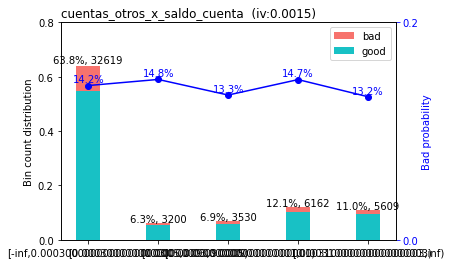

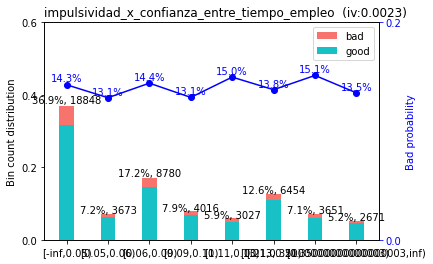

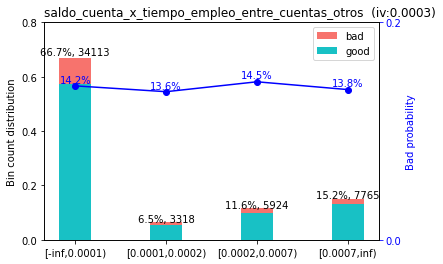

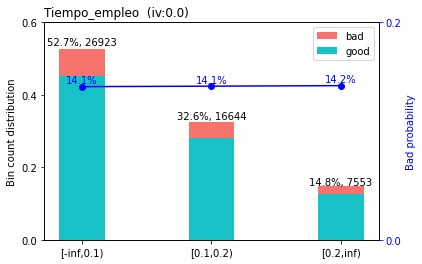

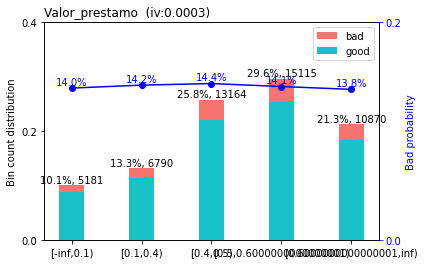

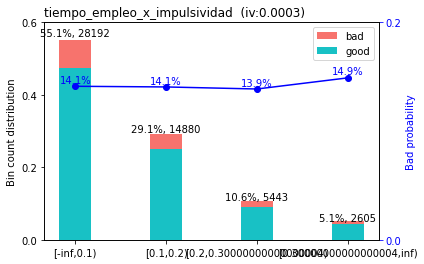

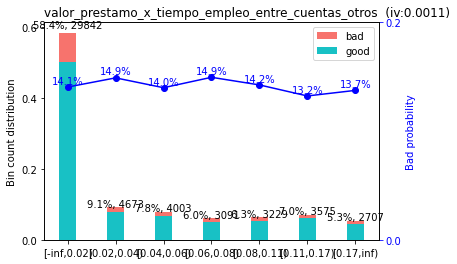

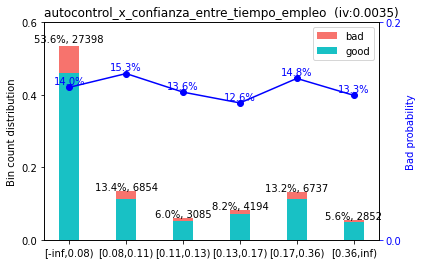

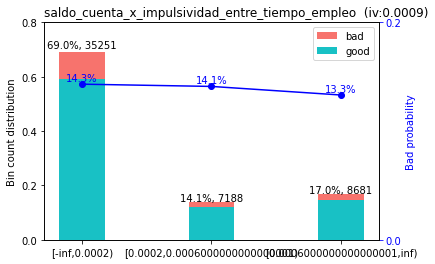

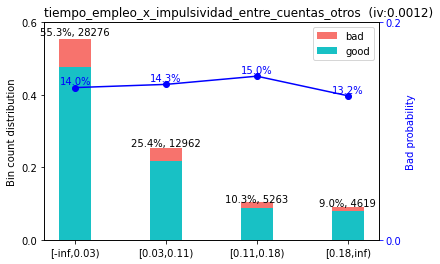

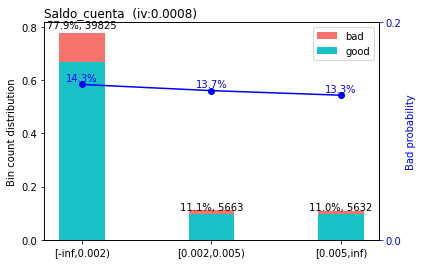

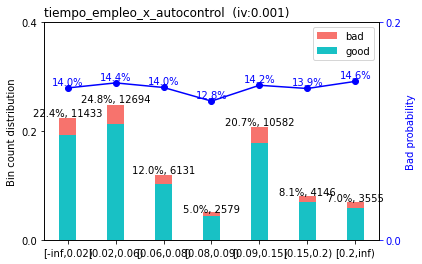

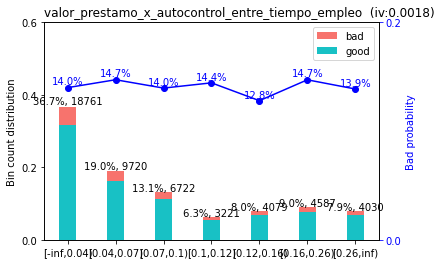

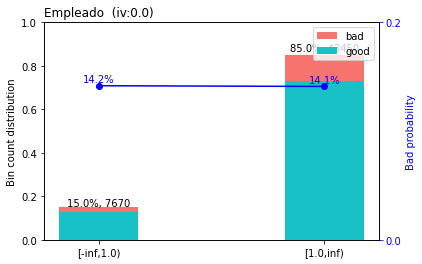

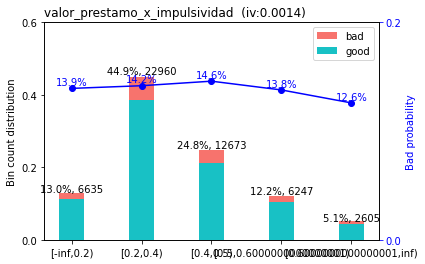

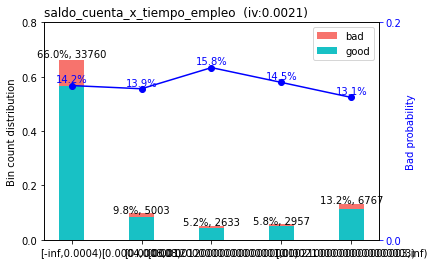

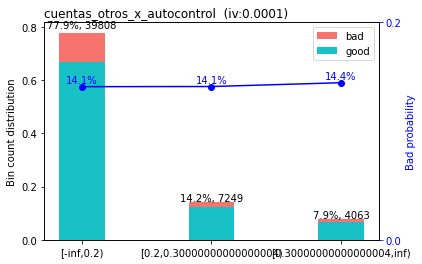

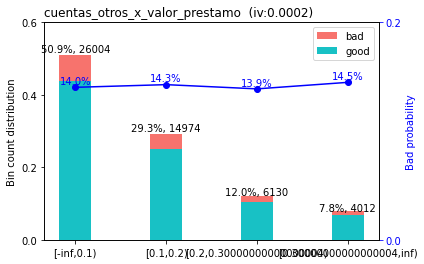

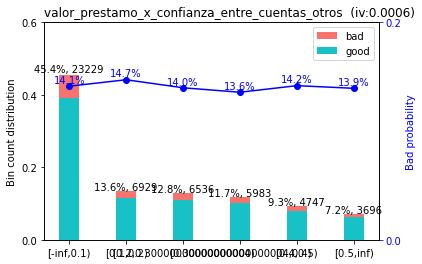

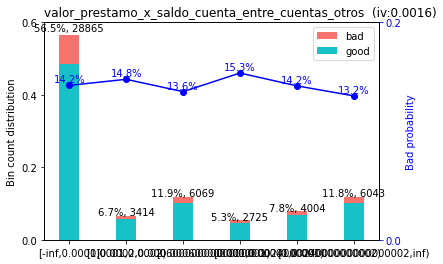

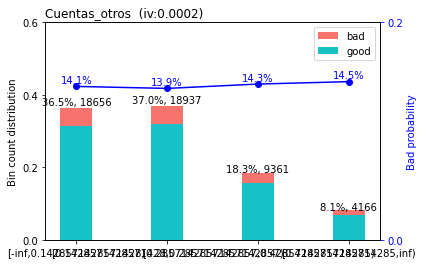

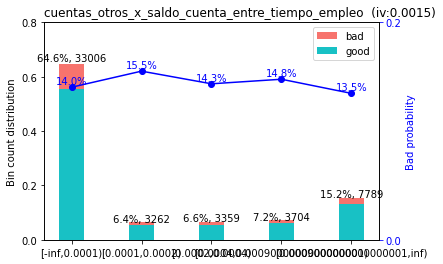

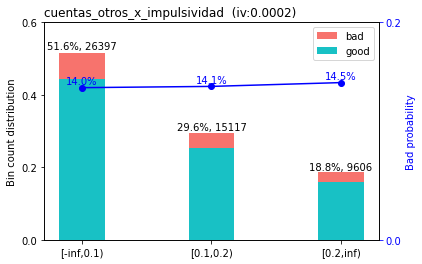

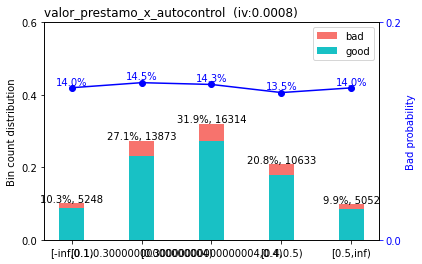

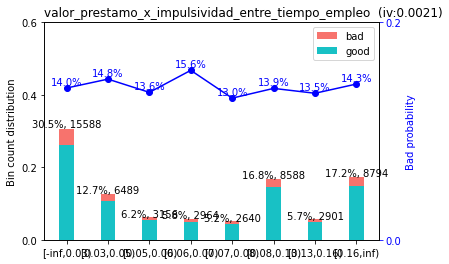

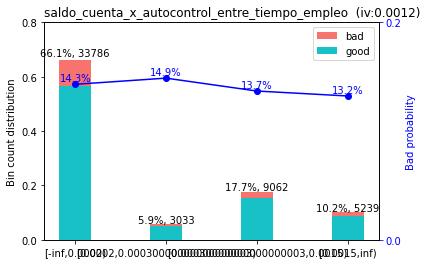

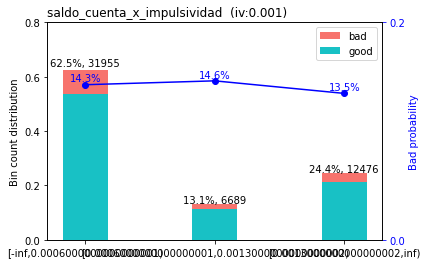

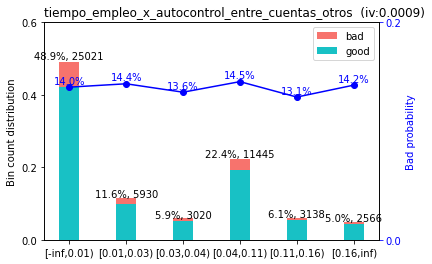

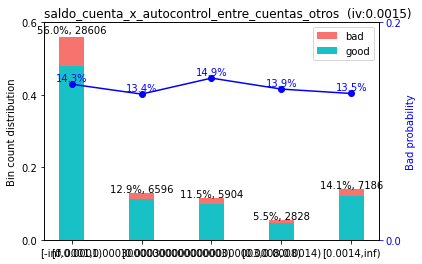

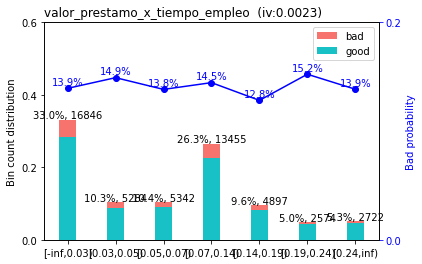

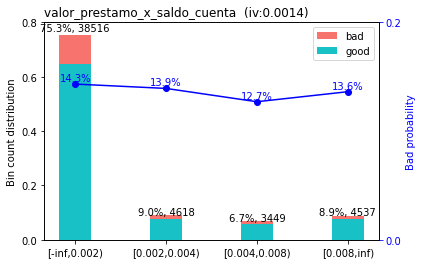

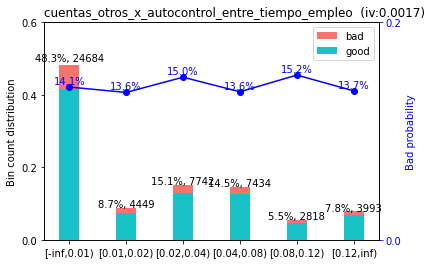

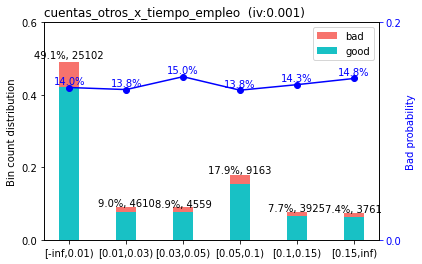

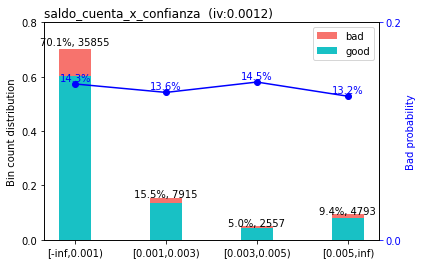

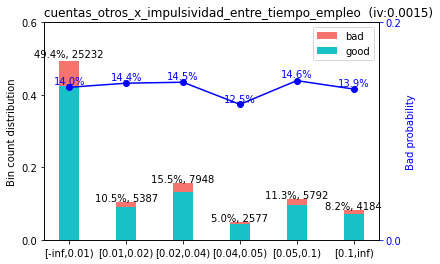

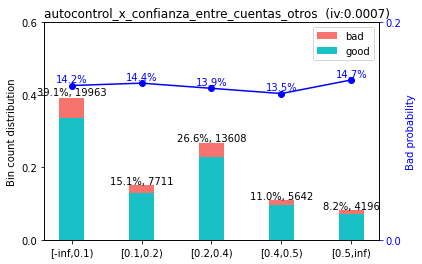

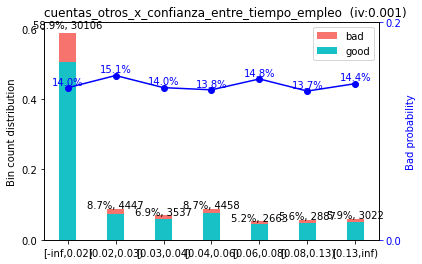

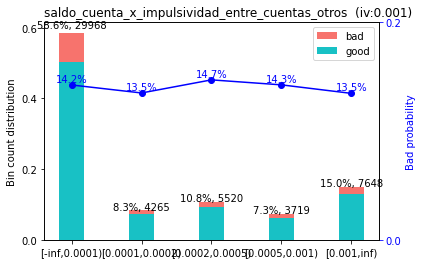

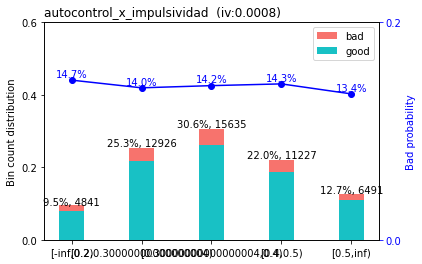

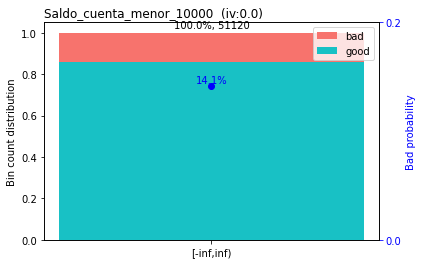

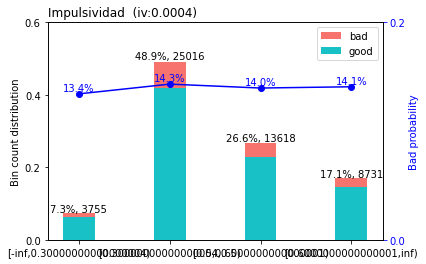

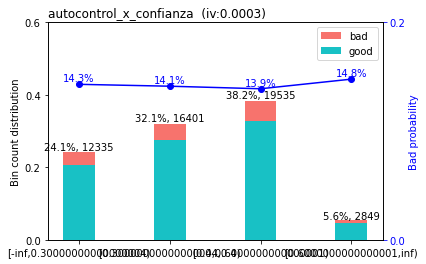

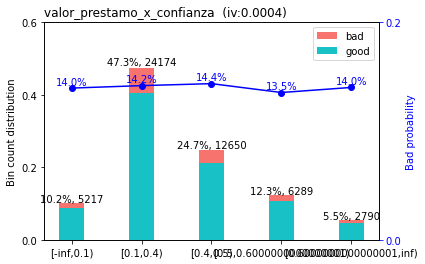

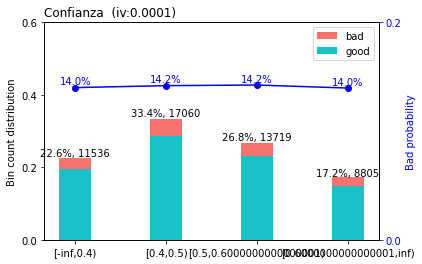

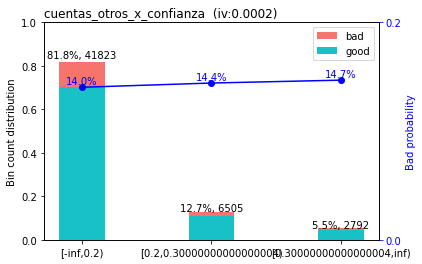

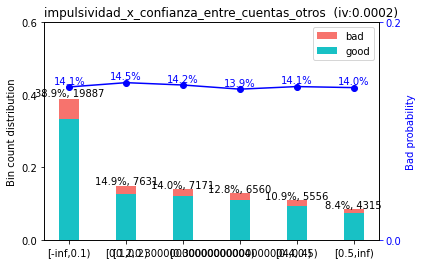

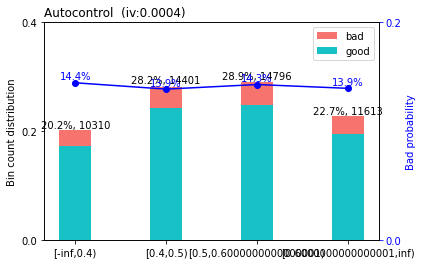

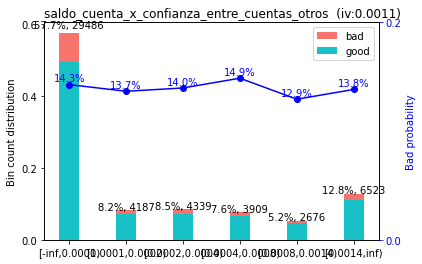

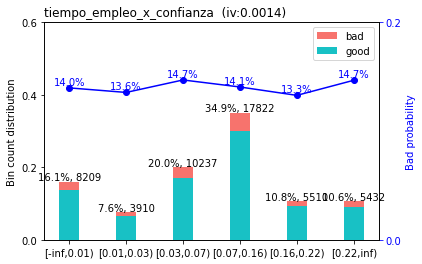

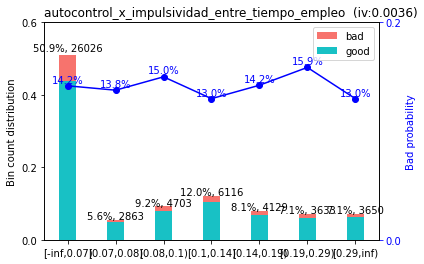

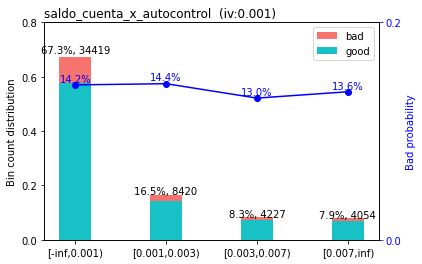

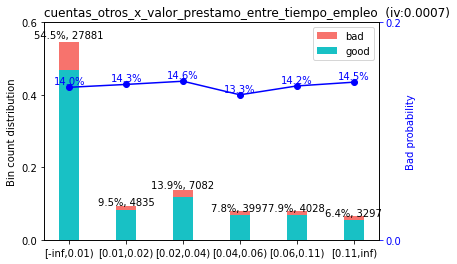

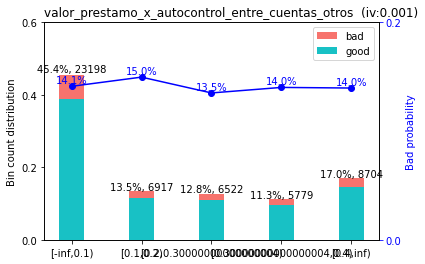

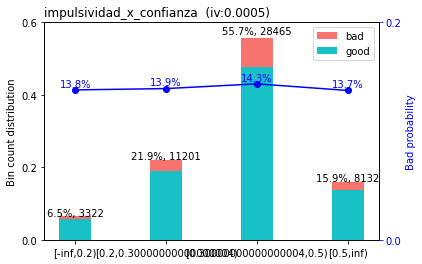

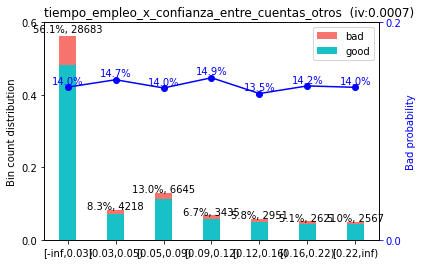

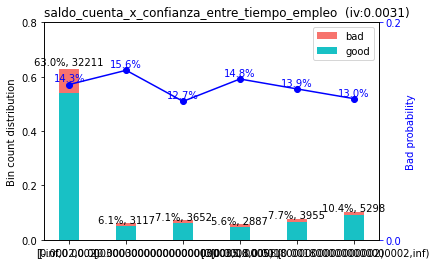

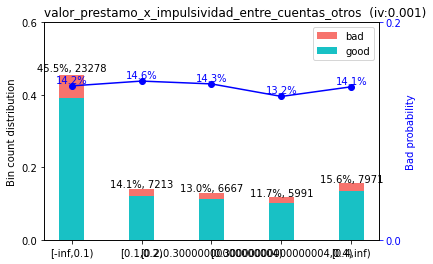

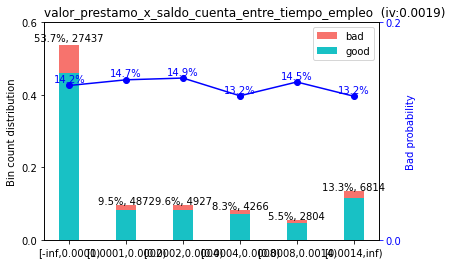

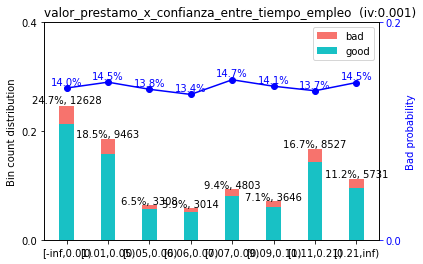

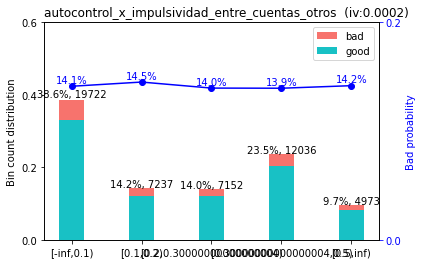

In [13]:
sc.woebin_plot(cortes)

In [14]:
if 'target' in x_train.columns:
    del x_train['target']

In [15]:
x_train.columns == x_valid.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

### >> MODELO

In [16]:
import statsmodels.api as sm

#print(help(sm.Logit))

In [17]:
logit_model = sm.Logit(y_train , x_train)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.406702
         Iterations 9


In [18]:
pesos_ =  pd.DataFrame(calcular_pesos(result)).reset_index()
pesos_.columns = ['variable', 'peso']
pesos_.tail(65)

,variable,peso
0,cuentas_otros_x_valor_prestamo,0.001572
1,valor_prestamo_x_saldo_cuenta_entre_cuentas_otros,0.004448
2,saldo_cuenta_x_impulsividad_entre_cuentas_otros,0.007700
3,impulsividad_x_confianza_entre_cuentas_otros,0.010383
4,cuentas_otros_x_saldo_cuenta_entre_tiempo_empleo,0.017481
5,cuentas_otros_x_impulsividad_entre_tiempo_empleo,0.018858
6,cuentas_otros_x_valor_prestamo_entre_tiempo_em...,0.025496
7,saldo_cuenta_x_tiempo_empleo_entre_cuentas_otros,0.040631
8,cuentas_otros_x_impulsividad,0.050101
9,cuentas_otros_x_autocontrol,0.057066


In [19]:
pesos_.to_excel('pesos.xlsx', index=False)

In [20]:
pesos_.columns

Index(['variable', 'peso'], dtype='object')

In [21]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                           Results: Logit
====================================================================================================
Model:                           Logit                       Pseudo R-squared:            0.001     
Dependent Variable:              Incumplimiento              AIC:                         41701.1681
Date:                            2021-06-12 10:58            BIC:                         42231.6840
No. Observations:                51120                       Log-Likelihood:              -20791.   
Df Model:                        59                          LL-Null:                     -20809.   
Df Residuals:                    51060                       LLR p-value:                 0.99013   
Converged:                       1.0000                      Scale:                       1.0000    
No. Iterations:                  9.0000                                                             
----------------------------------------------------------------------------------------------------
                                                    Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
----------------------------------------------------------------------------------------------------
Empleado                                            -0.0394   0.0539 -0.7315 0.4645  -0.1451  0.0662
Tiempo_empleo                                        0.5886   1.1893  0.4950 0.6206  -1.7423  2.9196
Saldo_cuenta                                        -9.5229  10.4061 -0.9151 0.3601 -29.9184 10.8726
Valor_prestamo                                      -0.4407   0.5278 -0.8350 0.4037  -1.4751  0.5937
Cuentas_otros                                       -0.7803   0.7813 -0.9987 0.3179  -2.3116  0.7510
Autocontrol                                         -2.0457   0.5562 -3.6780 0.0002  -3.1359 -0.9556
Impulsividad                                        -1.0314   0.5374 -1.9192 0.0550  -2.0846  0.0219
Confianza                                           -2.1677   0.5930 -3.6554 0.0003  -3.3300 -1.0054
Saldo_cuenta_menor_10000                            -0.3723   0.1358 -2.7422 0.0061  -0.6385 -0.1062
cuentas_otros_x_valor_prestamo                      -0.0153   0.4070 -0.0376 0.9700  -0.8131  0.7825
cuentas_otros_x_valor_prestamo_entre_tiempo_empleo   0.1560   1.0308  0.1514 0.8797  -1.8643  2.1763
cuentas_otros_x_saldo_cuenta                         0.9153   2.1243  0.4309 0.6666  -3.2482  5.0787
cuentas_otros_x_saldo_cuenta_entre_tiempo_empleo     0.3142   2.5064  0.1253 0.9003  -4.5983  5.2266
cuentas_otros_x_tiempo_empleo                        0.2093   0.3556  0.5885 0.5562  -0.4878  0.9064
cuentas_otros_x_autocontrol                          0.1592   0.7029  0.2265 0.8208  -1.2185  1.5369
cuentas_otros_x_autocontrol_entre_tiempo_empleo     -0.8998   1.4382 -0.6257 0.5315  -3.7187  1.9190
cuentas_otros_x_impulsividad                         0.1646   0.7759  0.2122 0.8319  -1.3561  1.6854
cuentas_otros_x_impulsividad_entre_tiempo_empleo     0.2078   1.5961  0.1302 0.8964  -2.9205  3.3361
cuentas_otros_x_confianza                            0.8257   0.8034  1.0278 0.3040  -0.7489  2.4003
cuentas_otros_x_confianza_entre_tiempo_empleo        0.4780   1.5462  0.3092 0.7572  -2.5525  3.5086
valor_prestamo_x_saldo_cuenta                        2.8726   3.9313  0.7307 0.4650  -4.8326 10.5778
valor_prestamo_x_saldo_cuenta_entre_cuentas_otros   -0.3312   5.2377 -0.0632 0.9496 -10.5968  9.9345
valor_prestamo_x_saldo_cuenta_entre_tiempo_empleo  -11.2910   8.2789 -1.3638 0.1726 -27.5174  4.9354
valor_prestamo_x_tiempo_empleo                       0.6810   0.6543  1.0409 0.2979  -0.6013  1.9634
valor_prestamo_x_tiempo_empleo_entre_cuentas_otros  -1.7954   0.9684 -1.8540 0.0637  -3.6934  0.1026
valor_prestamo_x_autocontrol                         0.3590   0.7074  0.5075 0.6118  -1.0275  1.7455
valor_prestamo_x_autocontrol_entre_cuentas_otros     0.

In [22]:
import numpy as np
#prediciendo en base al modelo 
y_pred_prob_train = result.predict(x_train)
y_pred_class_train = np.where(y_pred_prob_train < 0.5, 0 , 1)

y_pred_prob_valid = result.predict(x_valid)
y_pred_class_valid = np.where(y_pred_prob_valid < 0.5, 0 , 1)

<AxesSubplot:>

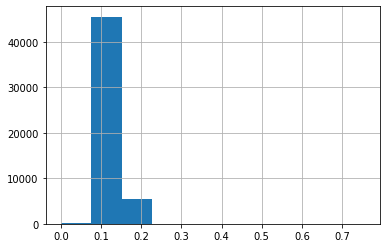

In [23]:
y_pred_prob_train.hist()

<AxesSubplot:>

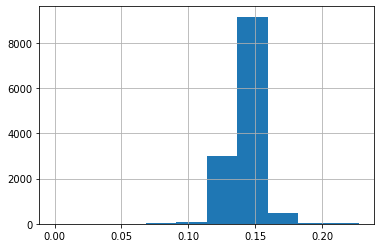

In [24]:
y_pred_prob_valid.hist()

In [42]:
pd.Series(y_pred_class_train).value_counts()

0    51119
1        1
dtype: int64

In [43]:
pd.Series(y_pred_class_valid).value_counts()

0    12781
dtype: int64

#### >>> INDICADORES DE PROBABILIDAD

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

In [26]:
auc = roc_auc_score(y_train, y_pred_prob_train)
print("AUC: %1.3f" % auc)
print("GINI: %1.3f" % (2*auc-1))

auc = roc_auc_score(y_valid, y_pred_prob_valid)
print("AUC: %1.3f" % auc)
print("GINI: %1.3f" % (2*auc-1))

AUC: 0.517
GINI: 0.034
AUC: 0.503
GINI: 0.005


#### >>> INDICADORES DE CLASE

In [27]:
print("RECALL     : %1.8f" % recall_score(y_train, y_pred_class_train))
print("EFECTIVIDAD: %1.8f" % precision_score(y_train, y_pred_class_train))
print("F1 SCORE   : %1.8f" % f1_score(y_train, y_pred_class_train))
print("F1 SCORE   : %1.8f" % accuracy_score(y_train, y_pred_class_train))

RECALL     : 0.00013858
EFECTIVIDAD: 1.00000000
F1 SCORE   : 0.00027712


In [39]:
print("RECALL     : %1.8f" % recall_score(y_valid, y_pred_class_valid))
print("EFECTIVIDAD: %1.8f" % precision_score(y_valid, y_pred_class_valid))
print("F1 SCORE   : %1.8f" % f1_score(y_valid, y_pred_class_valid))
print("F1 SCORE   : %1.8f" % accuracy_score(y_valid, y_pred_class_valid))

RECALL     : 0.00000000
EFECTIVIDAD: 0.00000000
F1 SCORE   : 0.00000000
F1 SCORE   : 0.85885298


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### >> CAMBIO DE PUNTO DE CORTE

In [29]:
from scipy.optimize import differential_evolution


optimization = differential_evolution(
    lambda c: -1*recall_score(y_train, np.array([0 if _ < c[0] else 1 for _ in y_pred_prob_train])), 
    [(0, 1)],
    seed=SEED
)
optimization

     fun: -1.0
 message: 'Optimization terminated successfully.'
    nfev: 122
     nit: 7
 success: True
       x: array([0.01298791])

In [30]:
optimization_auc = differential_evolution(
    lambda c: -1*roc_auc_score(y_train, np.array([0 if _ < c[0] else 1 for _ in y_pred_prob_train])), 
    [(0, 1)],
    seed=SEED
)
optimization_auc

     fun: -0.5022665860769395
 message: 'Optimization terminated successfully.'
    nfev: 32
     nit: 1
 success: True
       x: array([0.12192201])

In [31]:
nuevo_corte = optimization_auc["x"][0]
nuevo_corte

0.12192200646606993

In [32]:
y_pred_class_train_opt = np.where(y_pred_prob_train < nuevo_corte, 0 , 1)
y_pred_class_valid_opt = np.where(y_pred_prob_valid < nuevo_corte, 0 , 1)

In [33]:
pd.Series(y_pred_class_train_opt).value_counts()

1    49830
0     1290
dtype: int64

In [34]:
y_train.value_counts()

Incumplimiento
0                 43904
1                  7216
dtype: int64

In [35]:
pd.Series(y_pred_class_valid_opt).value_counts()

1    12456
0      325
dtype: int64

In [36]:
y_valid.value_counts()

Incumplimiento
0                 10977
1                  1804
dtype: int64

In [44]:
print("/"*25, ' TRAIN')
print("RECALL     : %1.8f" % recall_score(y_train, y_pred_class_train_opt))
print("EFECTIVIDAD: %1.8f" % precision_score(y_train, y_pred_class_train_opt))
print("F1 SCORE   : %1.8f" % f1_score(y_train, y_pred_class_train_opt))
print("F1 SCORE   : %1.8f" % accuracy_score(y_train, y_pred_class_train_opt))

print("/"*25, ' VALIDATION')
print("RECALL     : %1.8f" % recall_score(y_valid, y_pred_class_valid_opt))
print("EFECTIVIDAD: %1.8f" % precision_score(y_valid, y_pred_class_valid_opt))
print("F1 SCORE   : %1.8f" % f1_score(y_valid, y_pred_class_valid_opt))
print("F1 SCORE   : %1.8f" % accuracy_score(y_valid, y_pred_class_valid_opt))

/////////////////////////  TRAIN
RECALL     : 0.97865854
EFECTIVIDAD: 0.14172185
F1 SCORE   : 0.24758966
F1 SCORE   : 0.16036776
/////////////////////////  VALIDATION
RECALL     : 0.97505543
EFECTIVIDAD: 0.14121708
F1 SCORE   : 0.24670407
F1 SCORE   : 0.15953368


In [38]:
top_iv = [row[0] for row in listado_mayor_prob_corte][:len(cols_aporte) + 5]
top_iv

NameError: name 'cols_aporte' is not defined